In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys
from scipy.stats import entropy
from sklearn.datasets import load_digits
from tqdm import tqdm
from scipy.optimize import linear_sum_assignment
from scipy.cluster.hierarchy import dendrogram, linkage
import multiprocessing
from multiprocessing import Pool
import itertools
from scipy.cluster.hierarchy import fcluster
from collections import Counter
import datetime
from multiprocessing import Process
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from statistics import median_low
from functools import partial
import importlib

In [2]:
# import funcs

In [3]:
def f(x, n = 0):
    return x*x + n

def main():
    print('hi')
    with Pool(5) as p:
        print('by')
        print(p.map(f, [1, 2, 3]))
        print('hibi')
        
if __name__ == '__main__':
    main()

hi
by
[1, 4, 9]
hibi


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# path_to_drive = 'drive/MyDrive/Colab Notebooks/'
path_to_drive = ''

In [45]:
df_chem = pd.read_excel(path_to_drive + "learn_A2BCO6_II-III-V_multi_elem_4-07.xls")
df_chem = df_chem.drop_duplicates(subset = list(set(df_chem.columns) - {'Class', 'Состав'}), keep = 'first').reset_index(drop = True)
df_chem_data = df_chem.drop(columns = {'Состав', 'Class'})
df_chem_label = df_chem.Class
df_chem.head()

,Состав,Class,E8-1,I8-2,S6-3,S5-4,E2-5,E5-6,E6-7,E7-8,...,M6-81,M8-82,M9-83,I10-84,A5-85,S15-86,S1-87,C2-88,C1-89,E10-90
0,Sr2AlNbO6,1,4.20,237.0,1.25,2.01,1.5,577.6,1817,2745,...,16,11,94,26.79,5,1.44,3.210,1653,1043,0.84
1,Sr2AlSbO6,1,4.20,237.0,1.25,2.01,1.5,577.6,1817,2745,...,16,11,94,26.79,5,1.44,3.210,1653,1043,0.84
2,Sr2AlTaO6,1,4.20,237.0,1.25,2.01,1.5,577.6,1817,2745,...,16,11,94,26.79,5,1.44,3.210,1653,1043,0.84
3,Ba2ScBiO6,1,3.25,15.8,1.10,2.21,1.3,631.0,1235,2389,...,15,12,95,28.07,6,1.61,3.402,1913,983,0.81
4,Ba2AlTaO6,1,4.20,237.0,1.25,2.01,1.5,577.6,1817,2745,...,15,12,95,28.07,6,1.61,3.402,1913,983,0.81


In [46]:
df_chem[
    df_chem.duplicated(subset=df_chem.drop(columns = {'Class', 'Состав'}).columns, keep = False)
]

,Состав,Class,E8-1,I8-2,S6-3,S5-4,E2-5,E5-6,E6-7,E7-8,...,M6-81,M8-82,M9-83,I10-84,A5-85,S15-86,S1-87,C2-88,C1-89,E10-90


In [47]:
# for col in df_chem.columns:
#     print(col, type(df_chem.loc[0, col]))

In [48]:
scaler = StandardScaler()
scaler.fit(df_chem_data)

df_chem_data_normalized = scaler.transform(df_chem_data)

In [49]:
RANDOM_STATE = 83

In [42]:
#Our Dataset
data = np.array([0.40,0.53,0.22,0.38,0.35,0.32,0.26,0.19,0.08,0.41,0.45,0.30]).reshape(6,2)
print(data)

[[0.4  0.53]
 [0.22 0.38]
 [0.35 0.32]
 [0.26 0.19]
 [0.08 0.41]
 [0.45 0.3 ]]


In [43]:
digits = load_digits()
targets = digits.target
digits.data.shape

(1797, 64)

Visualising Data

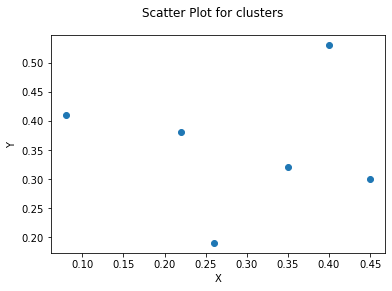

In [15]:
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(data[:,0],data[:,1])

  Distance Matrix: It is the matrix which contains distances between all the datapoints. If you have n datapoints, the distance matrix will be of order nXn.
  To calculate distance matrix, we use pairwise distance function of sklearn which returns distance matrix. For hierarchical clustering we use euclidean distance to calculate distance between two datapoints.

In [16]:
def add_dist(lst_clusters, clust_labels, target_labels):
    
    true_list = []
    false_list = []
    entropy_true_res = []
    entropy_false_res = []
    
    for it in lst_clusters:
        
        true_list = list(
            target_labels[clust_labels == it] == it
        ) + [True]
        
        false_list = list(
            target_labels[clust_labels == it] == it
        ) + [False]
        
        entropy_true_res.append(entropy(true_list))
        entropy_false = entropy(false_list)
        
        if str(entropy_false) == "nan":
            entropy_false_res.append(0)
        else:
            entropy_false_res.append(entropy_false)
    
    return entropy_true_res, entropy_false_res

In [17]:
%%time
def find_clusters_with_entropy_v4(df_data, df_target, alpha = 0, len_cut = 100):
    linkage = "single"
    data_train, data_test, label_train, label_test =train_test_split(
         df_data[:len_cut],
         df_target[:len_cut],
         test_size = 0.3,
         random_state = RANDOM_STATE,
         stratify = df_target[:len_cut],
    )

    print(Counter(label_train))

    data = pairwise_distances(data_train, data_train, metric='euclidean').copy()
    targets = label_train.copy()
    np.fill_diagonal(data,sys.maxsize)

    len_data = data_train.shape[0]
    clusters = {}
    row_index = -1
    col_index = -1
    array = np.array([])

    for n in range(data.shape[0]):
        array = np.append(array, n)

    clusters[0] = array.copy()

    df_clusters = pd.DataFrame([])
    df_clusters["element"] = range(data.shape[0])
    num_targets = len(np.unique(targets))
    lst_targets = np.unique(targets)

    cluster_counter_array = np.array(2 * len_data)
    target_counter_array = np.array(2 * len_data)
    cluster_array_entropy = np.array(2 * len_data)
    len_add_arr = 2

    cluster_counter_array = [
        Counter([targets[i]])
        for i in range(len_data)
    ]

    target_counter_array = pd.DataFrame(
        [
            [
                Counter(targets[[i, j]])
                for j in range(len_data)
            ]
            for i in range(len_data)
        ]
    )

    cluster_array_entropy = pd.DataFrame(
        [
            [
                entropy(list(target_counter_array[i][j].values())/np.int64(len_add_arr))
                for j in range(len_data)
            ]
            for i in range(len_data)
        ]
    )

    print("5")
    cluster_array_entropy_k = cluster_array_entropy.copy()

    for k in tqdm(range(1, data.shape[0])):
        df_clusters["cluster"] = array
        data_with_entropy = data.copy()

        data_with_entropy = data_with_entropy + alpha * np.array(cluster_array_entropy_k)
        ind = np.unravel_index(np.argmin(data_with_entropy, axis=None), data.shape)
        row_index = ind[0]
        col_index = ind[1]
        min_val = data_with_entropy[ind]

        arr_row_index = array[row_index]
        arr_col_index = array[col_index]

        part1 = list(df_clusters[df_clusters.cluster == arr_row_index].element)
        part2 = list(df_clusters[df_clusters.cluster == arr_col_index].element)
        all_parts_combinations = np.transpose(
            [np.tile(part1, len(part2)), np.repeat(part2, len(part1))]
            )
        data[all_parts_combinations[:, 0], all_parts_combinations[:, 1]] = sys.maxsize
        data[all_parts_combinations[:, 1], all_parts_combinations[:, 0]] = sys.maxsize

        new_cluster_num = k - 1 + data.shape[0]

        add_cluster_counter = cluster_counter_array[row_index] + cluster_counter_array[col_index]

        target_counter_array.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
        target_counter_array.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

        cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
        cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

        add_col_counter = [
            cluster_counter_array[i] + add_cluster_counter
            for i in target_counter_array.columns
        ]

        add_col_entropy = [
            entropy(
                list(x.values())/np.sum(list(x.values()))
            )
            for x in add_col_counter
        ]

        cluster_counter_array = np.append(
            cluster_counter_array
            , add_cluster_counter
        )

        target_counter_array[new_cluster_num] = add_col_counter
        add_col_counter.append(add_cluster_counter)

        target_counter_array = target_counter_array.append(
            pd.Series(add_col_counter, name = new_cluster_num, index = target_counter_array.columns), ignore_index = False
        )

        cluster_array_entropy[new_cluster_num] = add_col_entropy
        add_col_entropy.append(sys.maxsize)
        cluster_array_entropy = cluster_array_entropy.append(
            pd.Series(
                add_col_entropy,
                name = new_cluster_num,
                index = cluster_array_entropy.columns
                ), ignore_index = False
        )

        array[list(part1)] = new_cluster_num
        array[list(part2)] = new_cluster_num
        clusters[k] = array.copy()

        add_col_entropy_new_cluster = [
            cluster_array_entropy[array[i]][new_cluster_num]
            for i in range(data.shape[0])
        ]

        all_parts = list(set(part1).union(set(part2)))

        for ind_all_parts in all_parts:
            cluster_array_entropy_k[ind_all_parts] = add_col_entropy_new_cluster
    num_elements = data.shape[0]
    n_targets = len(np.unique(targets))
    acc_res_train, dct_clusters_targets = cluster_score_v2(
        targets, list(clusters[num_elements - n_targets]), data
        )
    dct_prediction_cluster = dict(zip(
        list(range(data_train.shape[0])),
        clusters[num_elements - n_targets].astype(int))
    )


    # return data_test, data_train, label_test, dct_prediction_cluster, dct_clusters_targets,

    acc_res_test, df_test_check = get_test_result(
            data_test,
            data_train,
            label_test,
            dct_prediction_cluster,
            dct_clusters_targets,
            col_pred_name = "prediction_target"
    )

    # arr_test_closest_to_train = pairwise_distances(
    #     data_test
    #     , data_train
    #     , metric='euclidean'
    # ).argmin(axis = 1)
    # dct_test_closest_to_train = dict(
    #     zip((range(data_test.shape[0])), arr_test_closest_to_train)
    # )

    # df_test_check = pd.DataFrame(list(range(data_test.shape[0])), columns = ["test_index"])
    # df_test_check["closest_point_from_train"] = arr_test_closest_to_train
    # df_test_check["prediction_cluster"] = df_test_check["closest_point_from_train"].map(dct_prediction_cluster)
    # df_test_check["prediction_target"] = df_test_check["prediction_cluster"].map(dct_clusters_targets)
    # df_test_check["target"] = label_test

    # acc_res_test = np.sum(df_test_check["prediction_target"] == df_test_check["target"])/df_test_check.shape[0]
    
    return acc_res_train, acc_res_test, df_test_check, dct_clusters_targets

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.34 µs


In [18]:
def rename_columns(df : pd.DataFrame, suffix : str):
    df.rename(columns = {df.columns : df.columns + suffix})
    return df

In [19]:
# rename_columns(df_tmp, '1111')

In [20]:
%%time
linkage = "single"
def find_clusters_with_entropy_v5(
    data_train, data_test,
    label_train, label_test,
    alpha = 0, len_cut = 100,
    linkage = 'single'
    ):

    data = pairwise_distances(data_train, data_train, metric='euclidean').copy()
    targets = label_train.copy()
    
    if linkage == 'single':
        FILLNA_CONST = sys.maxsize
    else:
        FILLNA_CONST = -sys.maxsize
    
    np.fill_diagonal(data,FILLNA_CONST)

    len_data = data_train.shape[0]
    clusters = {}
    row_index = -1
    col_index = -1
    array = np.array([])

    for n in range(data.shape[0]):
        array = np.append(array, n)

    clusters[0] = array.copy()

    df_clusters = pd.DataFrame([])
    df_clusters["element"] = range(data.shape[0])
    num_targets = len(np.unique(targets))
    lst_targets = np.unique(targets)

    cluster_counter_array = np.array(2 * len_data)
    target_counter_array = np.array(2 * len_data)
    cluster_array_entropy = np.array(2 * len_data)
    len_add_arr = 2

    cluster_counter_array = [
        Counter([targets[i]])
        for i in range(len_data)
    ]

    target_counter_array = pd.DataFrame(
        [
            [
                Counter(targets[[i, j]])
                for j in range(len_data)
            ]
            for i in range(len_data)
        ]
    )

    cluster_array_entropy = pd.DataFrame(
        [
            [
                entropy(list(target_counter_array[i][j].values())/np.int64(len_add_arr))
                for j in range(len_data)
            ]
            for i in range(len_data)
        ]
    )

    cluster_array_entropy_k = cluster_array_entropy.copy()

    for k in tqdm(range(1, data.shape[0])):
        df_clusters["cluster"] = array
        data_with_entropy = data.copy()
#         df_distance = pd.DataFrame(data, columns = df_clusters["element"].values)
#         df_distance['element_index'] = df_clusters["element"].values
#         df_distance_flat = pd.wide_to_long(df, [''], i="element_index", j="element_column")
#         df_distance_flat.rename(columns = {'' : 'distance'})
#         df_distance_flat_left = df_distance_flat[df_distance_flat.element_index <= df_distance_flat.element_column]
#         df_distance_flat_right = df_distance_flat[df_distance_flat.element_index > df_distance_flat.element_column]
#         df_distance_flat_right.rename(columns = {'element_index' : 'element_column', 'element_column' : 'element_index'}, inplace = True)
#         df_distance_flat_without_duplicates = pd.concat([df_distance_flat_left, df_distance_flat_right]).drop_duplicates()
#         df_distance_flat_without_duplicates = df_distance_flat_without_duplicates.merge(
#             df_clusters.rename(columns)
#         )

        data_with_entropy = data_with_entropy + alpha * np.array(cluster_array_entropy_k)
        if linkage == 'single':
            ind = np.unravel_index(np.argmin(data_with_entropy, axis=None), data.shape)
#         else:
#             ind = np.unravel_index(np.argmax(data_with_entropy, axis=None), data.shape)
#             df_clusters["val"] = True
#             arr_clusters_boolean = df_clusters.pivot("cluster", "element", "val").fillna(False).to_numpy()
#             arr_mean_dist = arr_clusters_boolean.dot(data).dot(arr_clusters_boolean.transpose())

        row_index = ind[0]
        col_index = ind[1]
        min_val = data_with_entropy[ind]

        arr_row_index = array[row_index]
        arr_col_index = array[col_index]

        part1 = list(df_clusters[df_clusters.cluster == arr_row_index].element)
        part2 = list(df_clusters[df_clusters.cluster == arr_col_index].element)
        all_parts_combinations = np.transpose(
            [np.tile(part1, len(part2)), np.repeat(part2, len(part1))]
            )
        data[all_parts_combinations[:, 0], all_parts_combinations[:, 1]] = FILLNA_CONST
        data[all_parts_combinations[:, 1], all_parts_combinations[:, 0]] = FILLNA_CONST

        new_cluster_num = k - 1 + data.shape[0]

        add_cluster_counter = cluster_counter_array[row_index] + cluster_counter_array[col_index]

        target_counter_array.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
        target_counter_array.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

        cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
        cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

        add_col_counter = [
            cluster_counter_array[i] + add_cluster_counter
            for i in target_counter_array.columns
        ]

        add_col_entropy = [
            entropy(
                list(x.values())/np.sum(list(x.values()))
            )
            for x in add_col_counter
        ]

        cluster_counter_array = np.append(
            cluster_counter_array
            , add_cluster_counter
        )

        target_counter_array[new_cluster_num] = add_col_counter
        add_col_counter.append(add_cluster_counter)

        target_counter_array = target_counter_array.append(
            pd.Series(add_col_counter, name = new_cluster_num, index = target_counter_array.columns), ignore_index = False
        )

        cluster_array_entropy[new_cluster_num] = add_col_entropy
        add_col_entropy.append(FILLNA_CONST)
        cluster_array_entropy = cluster_array_entropy.append(
            pd.Series(
                add_col_entropy,
                name = new_cluster_num,
                index = cluster_array_entropy.columns
                ), ignore_index = False
        )

        array[list(part1)] = new_cluster_num
        array[list(part2)] = new_cluster_num
        clusters[k] = array.copy()

        add_col_entropy_new_cluster = [
            cluster_array_entropy[array[i]][new_cluster_num]
            for i in range(data.shape[0])
        ]

        all_parts = list(set(part1).union(set(part2)))

        for ind_all_parts in all_parts:
            cluster_array_entropy_k[ind_all_parts] = add_col_entropy_new_cluster

    n_targets = len(np.unique(label_train))
    num_elements = data.shape[0]
    clusters_final = clusters[num_elements - n_targets]
    return clusters_final

def make_df_from_dict(dct, key_name, value_name):
    
    res = pd.DataFrame.from_dict(
        dct, orient='index', columns=[value_name]
        )\
        .reset_index()\
        .rename(columns = {"index" : key_name})
    return res

def get_train_result(data_train, label_train, clusters_final):

    num_elements = data_train.shape[0]
    acc_res_train, dct_clusters_targets = cluster_score_v3(
        label_train, list(clusters_final), num_elements
        )
    dct_prediction_cluster = dict(zip(
        list(range(data_train.shape[0])), clusters_final.astype(int))
    )
    df_train_check = make_df_from_dict(
        dct_prediction_cluster, "train_index", "prediction_cluster"
        )
    df_train_check["prediction_target"] = df_train_check["prediction_cluster"]\
        .map(dct_clusters_targets)
    df_train_check["target"] = label_train
    return acc_res_train, dct_clusters_targets, dct_prediction_cluster, df_train_check


def pipeline_func(df_data, df_target, alpha = 0, len_cut = 100):

    data_train, data_test, label_train, label_test =train_test_split(
            df_data[:len_cut],
            df_target[:len_cut],
            test_size = 0.3,
            random_state = RANDOM_STATE,
            stratify = df_target[:len_cut],
    )

    clusters_final = find_clusters_with_entropy_v5(
        data_train, data_test, label_train, label_test, alpha = alpha, len_cut = len_cut,
    )

    acc_res_train, dct_clusters_targets, dct_prediction_cluster, df_train_check = get_train_result(
        data_train, label_train, clusters_final
        )
    
    acc_res_test, df_test_check = get_test_result(
            data_test,
            data_train,
            label_test,
            dct_prediction_cluster,
            dct_clusters_targets,
            col_pred_name = "prediction_target"
    )

    return acc_res_train, acc_res_test, df_train_check, df_test_check

def pipeline_wrapper_func(alpha, df_data, df_target, len_cut = 100):

    print('check1')
    data_train, data_test, label_train, label_test =train_test_split(
            df_data[:len_cut],
            df_target[:len_cut],
            test_size = 0.3,
            random_state = RANDOM_STATE,
            stratify = df_target[:len_cut],
    )

    print('check2')
    clusters_final = find_clusters_with_entropy_v5(
        data_train, data_test, label_train, label_test, alpha = alpha, len_cut = len_cut,
    )

    print('check3')
    acc_res_train, dct_clusters_targets, dct_prediction_cluster, df_train_check = get_train_result(
        data_train, label_train, clusters_final
        )
    
    print('check4')
    acc_res_test, df_test_check = get_test_result(
            data_test,
            data_train,
            label_test,
            dct_prediction_cluster,
            dct_clusters_targets,
            col_pred_name = "prediction_target"
    )

    return acc_res_train, acc_res_test, df_train_check, df_test_check

def pipeline_wrapper_func_v2(alpha, len_cut = 100):

#     global df_data, df_target
    data_train, data_test, label_train, label_test =train_test_split(
            df_data[:len_cut],
            df_target[:len_cut],
            test_size = 0.3,
            random_state = RANDOM_STATE,
            stratify = df_target[:len_cut],
    )

    clusters_final = find_clusters_with_entropy_v6(
        data_train, data_test, label_train, label_test,
        alpha = alpha, gamma = 0.5, len_cut = len_cut, linkage = 'multiple'
    )

    acc_res_train, dct_clusters_targets, dct_prediction_cluster, df_train_check = get_train_result(
        data_train, label_train, clusters_final
        )
    
    acc_res_test, df_test_check = get_test_result(
            data_test,
            data_train,
            label_test,
            dct_prediction_cluster,
            dct_clusters_targets,
            col_pred_name = "prediction_target"
    )

    return acc_res_train, acc_res_test, df_train_check, df_test_check

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 8.82 µs


In [21]:
df = pd.DataFrame({"1970" : {0 : "a", 1 : "b", 2 : "c"},
                   "1980" : {0 : "d", 1 : "e", 2 : "f"},
                   "1990" : {0 : 2.5, 1 : 1.2, 2 : .7},
                   "2000" : {0 : 3.2, 1 : 1.3, 2 : .1},
                #    "X"     : dict(zip(range(3), np.random.randn(3)))
                  })
df["id"] = df.index
df
df_tmp = pd.wide_to_long(df, [""], i="id", j="year")
df_tmp.rename(columns = {'' : "qqq"}, inplace = True)
df_tmp

,,qqq
id,year,
0,1970,a
1,1970,b
2,1970,c
0,1980,d
1,1980,e
2,1980,f
0,1990,2.5
1,1990,1.2
2,1990,0.7


In [22]:
df

,1970,1980,1990,2000,id
0,a,d,2.5,3.2,0
1,b,e,1.2,1.3,1
2,c,f,0.7,0.1,2


In [23]:
df_tmp = pd.DataFrame([[0, 1], [2, 3]], columns = ["a", "b"])
df_tmp = df_tmp.groupby("a").agg({"b" : ["max", "mean"]})
# df_tmp['tmp_col'] = 1
df_tmp.columns = df_tmp.columns.get_level_values(1)

In [26]:
df_tmp.columns

Index(['max', 'mean'], dtype='object')

In [28]:
%%time
gamma = 0
data = pairwise_distances(df_chem_data_normalized, df_chem_data_normalized, metric='euclidean').copy()

np.fill_diagonal(data,sys.maxsize)

array = np.array([])
for n in range(data.shape[0]):
    array = np.append(array, n)

df_clusters = pd.DataFrame([])
df_clusters["element"] = [x for x in range(data.shape[0])]
df_clusters["cluster"] = array.copy()

df_distance = pd.DataFrame(
    data, columns = df_clusters["element"].values.astype(str))
df_distance['element_index'] = df_clusters["element"].values

df_distance_flat = pd.wide_to_long(
    df_distance, [''], i="element_index", j="element_column").reset_index()
df_distance_flat = df_distance_flat.rename(
    columns = {'' : 'distance'}).copy()
df_distance_flat['element_index'] =\
    df_distance_flat['element_index'].astype('int')

df_distance_flat_left = df_distance_flat[
    df_distance_flat.element_index <= df_distance_flat.element_column]
df_distance_flat_right = df_distance_flat[
    df_distance_flat.element_index > df_distance_flat.element_column]
df_distance_flat_right = df_distance_flat_right.rename(columns = {
    'element_index' : 'element_column',
    'element_column' : 'element_index'}).copy()

print(pd.concat([df_distance_flat_left, df_distance_flat_right]).shape)
df_distance_flat_without_duplicates = pd.concat(
    [df_distance_flat_left, df_distance_flat_right])\
    .sort_values(['element_index', 'element_column'])\
    .drop_duplicates(['element_index', 'element_column'])

df_distance_flat_without_duplicates =\
    df_distance_flat_without_duplicates.merge(
    df_clusters.rename(
        columns = {
            "element" : "element_index",
            "cluster" : "cluster_index"
        }),
    on = "element_index",
    how = "left"
).merge(
    df_clusters.rename(
        columns = {
            "element" : "element_column",
            "cluster" : "cluster_column"
        }),
    on = "element_column",
    how = "left"
)
print(df_distance_flat_without_duplicates.shape)
print(df_distance_flat_without_duplicates\
    .groupby(['element_index', 'element_column'])\
    .agg({'distance' : 'min'})\
    .sort_values('distance', ascending = True)\
    .shape)

df_distance_between_clusters = df_distance_flat_without_duplicates\
    .groupby(['element_index', 'element_column'])\
    .agg({'distance' : ['min', 'mean']})
df_distance_between_clusters["res_distance"] =\
    gamma * df_distance_between_clusters.distance["min"]\
    + (1 - gamma) * df_distance_between_clusters.distance["mean"]

tuple(df_distance_between_clusters.sort_values("res_distance", ascending = True).reset_index().loc[0, ["element_index", "element_column"]].values)

(300304, 3)
(150426, 5)
(150426, 1)
CPU times: user 1.72 s, sys: 94.7 ms, total: 1.82 s
Wall time: 414 ms


(395.0, 397.0)

In [29]:
np.unravel_index(np.argmin(data, axis=None), data.shape)

(277, 278)

In [30]:
tuple(df_distance_between_clusters.sort_values("res_distance", ascending = True).reset_index().loc[0, ["element_index", "element_column"]].values)

(395.0, 397.0)

In [31]:
def flatten_matrix(data, col_name):
    df_distance = pd.DataFrame(
        data, columns = col_name.astype(str))
    df_distance['element_index'] = col_name

    df_distance_flat = pd.wide_to_long(
        df_distance, [''], i="element_index", j="element_column").reset_index()
    df_distance_flat = df_distance_flat.rename(
        columns = {'' : 'distance'}).copy()
    df_distance_flat['element_index'] =\
        df_distance_flat['element_index'].astype('int')

    df_distance_flat_left = df_distance_flat[
        df_distance_flat.element_index <= df_distance_flat.element_column]
    df_distance_flat_right = df_distance_flat[
        df_distance_flat.element_index > df_distance_flat.element_column]
    df_distance_flat_right = df_distance_flat_right.rename(columns = {
        'element_index' : 'element_column',
        'element_column' : 'element_index'}).copy()

    df_distance_flat_without_duplicates = pd.concat(
        [df_distance_flat_left, df_distance_flat_right])\
        .sort_values(['element_index', 'element_column'])\
        .drop_duplicates(['element_index', 'element_column'])
    
    return df_distance_flat_without_duplicates

In [79]:
%%time
linkage = "single"
def find_clusters_with_entropy_v6(
    data_train, data_test,
    label_train, label_test,
    alpha = 0, len_cut = 100,
    gamma = 0,
    linkage = 'single'
    ):

    data = pairwise_distances(data_train, data_train, metric='euclidean').copy()
    targets = label_train.copy()
    
    FILLNA_CONST = sys.maxsize // 2
#     if linkage == 'single':
#         FILLNA_CONST = sys.maxsize
#     else:
#         FILLNA_CONST = -sys.maxsize

    
    np.fill_diagonal(data,FILLNA_CONST)

    len_data = data_train.shape[0]
    clusters = {}
    row_index = -1
    col_index = -1
    array = np.array([])

    for n in range(data.shape[0]):
        array = np.append(array, n)

    clusters[0] = array.copy()

    df_clusters = pd.DataFrame([])
    df_clusters["element"] = range(data.shape[0])
    num_targets = len(np.unique(targets))
    lst_targets = np.unique(targets)

    cluster_counter_array = np.array(2 * len_data)
    target_counter_array = np.array(2 * len_data)
    cluster_array_entropy = np.array(2 * len_data)
    len_add_arr = 2

    cluster_counter_array = [
        Counter([targets[i]])
        for i in range(len_data)
    ]

    target_counter_array = pd.DataFrame(
        [
            [
                Counter(targets[[i, j]])
                for j in range(len_data)
            ]
            for i in range(len_data)
        ]
    )

    cluster_array_entropy = pd.DataFrame(
        [
            [
                entropy(list(target_counter_array[i][j].values())/np.int64(len_add_arr))
                for j in range(len_data)
            ]
            for i in range(len_data)
        ]
    )

    cluster_array_entropy_k = cluster_array_entropy.copy()

    for k in tqdm(range(1, data.shape[0])):
        df_clusters["cluster"] = array.copy()
        data_with_entropy = data.copy()
        
#         df_distance = pd.DataFrame(data, columns = df_clusters["element"].values)
#         df_distance['element_index'] = df_clusters["element"].values
#         df_distance_flat = pd.wide_to_long(df_distance, [''], i="element_index", j="element_column")
#         df_distance_flat.rename(columns = {'' : 'distance'})
#         df_distance_flat_left = df_distance_flat[df_distance_flat.element_index <= df_distance_flat.element_column]
#         df_distance_flat_right = df_distance_flat[df_distance_flat.element_index > df_distance_flat.element_column]
#         df_distance_flat_right.rename(columns = {'element_index' : 'element_column', 'element_column' : 'element_index'}, inplace = True)
#         df_distance_flat_without_duplicates = pd.concat([df_distance_flat_left, df_distance_flat_right]).drop_duplicates()
#         df_distance_flat_without_duplicates = df_distance_flat_without_duplicates.merge(
#             df_clusters.rename(columns)
#         )

        if linkage == 'single':
            data_with_entropy = data_with_entropy + alpha * np.array(cluster_array_entropy_k)
            ind = np.unravel_index(np.argmin(data_with_entropy, axis=None), data.shape)
            min_val = data_with_entropy[ind]
        else:
            
            
#             df_distance = pd.DataFrame(
#                 data, columns = df_clusters["element"].values.astype(str))
#             df_distance['element_index'] = df_clusters["element"].values

#             df_distance_flat = pd.wide_to_long(
#                 df_distance, [''], i="element_index", j="element_column").reset_index()
#             df_distance_flat = df_distance_flat.rename(
#                 columns = {'' : 'distance'}).copy()
#             df_distance_flat['element_index'] =\
#                 df_distance_flat['element_index'].astype('int')

#             df_distance_flat_left = df_distance_flat[
#                 df_distance_flat.element_index <= df_distance_flat.element_column]
#             df_distance_flat_right = df_distance_flat[
#                 df_distance_flat.element_index > df_distance_flat.element_column]
#             df_distance_flat_right = df_distance_flat_right.rename(columns = {
#                 'element_index' : 'element_column',
#                 'element_column' : 'element_index'}).copy()

#             df_distance_flat_without_duplicates = pd.concat(
#                 [df_distance_flat_left, df_distance_flat_right])\
#                 .sort_values(['element_index', 'element_column'])\
#                 .drop_duplicates(['element_index', 'element_column'])
            df_distance_flat = flatten_matrix(
                data, df_clusters["element"].values
            )
            df_distance_flat_entropy = flatten_matrix(
                np.array(cluster_array_entropy), cluster_array_entropy.columns
            ).rename(columns = {
                "distance" : "entropy_distance",
                "element_index" : "cluster_index",
                "element_column" : "cluster_column"
            })
            df_distance_flat = df_distance_flat.merge(
                df_clusters.rename(columns = {
                        "element" : "element_index",
                        "cluster" : "cluster_index"
                    }),
                on = "element_index",
                how = "left"
            ).merge(
                df_clusters.rename(columns = {
                        "element" : "element_column",
                        "cluster" : "cluster_column"
                    }),
                on = "element_column",
                how = "left"
            )
            
            df_distance_between_clusters = df_distance_flat[
                    df_distance_flat.cluster_index != df_distance_flat.cluster_column
                ]\
                .groupby(['cluster_index', 'cluster_column'])\
                .agg({'distance' : ['max', 'mean']})
            df_distance_between_clusters.columns =\
                df_distance_between_clusters.columns.get_level_values(1)
            df_distance_between_clusters = df_distance_between_clusters.reset_index()
            df_distance_between_clusters["geometric_distance"] =\
                gamma * df_distance_between_clusters["max"]\
                + (1 - gamma) * df_distance_between_clusters["mean"]
            
#             print('hi', df_distance_between_clusters.columns)
            df_distance_flat = df_distance_flat.merge(
                df_distance_between_clusters[['cluster_index', 'cluster_column', "geometric_distance"]],
                on = ['cluster_index', 'cluster_column'],
                how = 'left'
            )
#             print('hi', df_distance_flat.columns)
            
            df_distance_flat = df_distance_flat.merge(
                df_distance_flat_entropy, 
                on = ['cluster_index', 'cluster_column'],
                how = 'left'
            )
#             print('hi')
            df_distance_flat.loc[~df_distance_flat.geometric_distance.isna(), 'res_distance'] =\
                (1 - 0.01 * alpha) * df_distance_flat.loc[
                    ~df_distance_flat.geometric_distance.isna(), "geometric_distance"
                ]\
                + 100 * alpha * df_distance_flat.loc[
                    ~df_distance_flat.geometric_distance.isna(), "entropy_distance"
                ]
            df_distance_flat["res_distance"] = df_distance_flat["res_distance"]\
                .fillna(FILLNA_CONST)
#             print(df_distance_flat.isna().sum())
            df_distance_flat['res_distance'] = df_distance_flat['res_distance'].astype('int64')
#             print('hi', df_distance_flat.loc[0, 'res_distance'])
            ind = tuple(map(
                int,
                df_distance_flat\
                .sort_values("res_distance", ascending = True)\
                .reset_index()\
                .loc[0, ["element_index", "element_column"]]\
                .values
            ))
#             min_val = df_distance_flat[ind]
#             print('hi', ind)
            
#             ind = np.unravel_index(np.argmax(data_with_entropy, axis=None), data.shape)
#             df_clusters["val"] = True
#             arr_clusters_boolean = df_clusters.pivot("cluster", "element", "val").fillna(False).to_numpy()
#             arr_mean_dist = arr_clusters_boolean.dot(data).dot(arr_clusters_boolean.transpose())

        row_index = ind[0]
        col_index = ind[1]

        arr_row_index = array[row_index]
        arr_col_index = array[col_index]

        part1 = list(df_clusters[df_clusters.cluster == arr_row_index].element)
        part2 = list(df_clusters[df_clusters.cluster == arr_col_index].element)
        all_parts_combinations = np.transpose(
            [np.tile(part1, len(part2)), np.repeat(part2, len(part1))]
            )
        data[all_parts_combinations[:, 0], all_parts_combinations[:, 1]] = FILLNA_CONST
        data[all_parts_combinations[:, 1], all_parts_combinations[:, 0]] = FILLNA_CONST

        new_cluster_num = k - 1 + data.shape[0]

        add_cluster_counter = cluster_counter_array[row_index] + cluster_counter_array[col_index]

        target_counter_array.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
        target_counter_array.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

        cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
        cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

        add_col_counter = [
            cluster_counter_array[i] + add_cluster_counter
            for i in target_counter_array.columns
        ]

        add_col_entropy = [
            entropy(
                list(x.values())/np.sum(list(x.values()))
            )
            for x in add_col_counter
        ]

        cluster_counter_array = np.append(
            cluster_counter_array
            , add_cluster_counter
        )

        target_counter_array[new_cluster_num] = add_col_counter
        add_col_counter.append(add_cluster_counter)

        target_counter_array = target_counter_array.append(
            pd.Series(
                add_col_counter, name = new_cluster_num, index = target_counter_array.columns
            ), ignore_index = False
        )

        cluster_array_entropy[new_cluster_num] = add_col_entropy
        add_col_entropy.append(FILLNA_CONST)
        cluster_array_entropy = cluster_array_entropy.append(
            pd.Series(
                add_col_entropy,
                name = new_cluster_num,
                index = cluster_array_entropy.columns
                ), ignore_index = False
        )

        array[list(part1)] = new_cluster_num
        array[list(part2)] = new_cluster_num
        clusters[k] = array.copy()

        add_col_entropy_new_cluster = [
            cluster_array_entropy[array[i]][new_cluster_num]
            for i in range(data.shape[0])
        ]

        all_parts = list(set(part1).union(set(part2)))

        for ind_all_parts in all_parts:
            cluster_array_entropy_k[ind_all_parts] = add_col_entropy_new_cluster

    n_targets = len(np.unique(label_train))
    num_elements = data.shape[0]
    clusters_final = clusters[num_elements - n_targets]
    return clusters_final


CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 18.1 µs


In [33]:
def get_test_result(
    data_test,
    data_train,
    label_test,
    dct_prediction_cluster,
    dct_clusters_targets,
    col_pred_name = "prediction_target"
    ):
    arr_test_closest_to_train = pairwise_distances(
        data_test
        , data_train
        , metric='euclidean'
    ).argmin(axis = 1)
    dct_test_closest_to_train = dict(
        zip((range(data_test.shape[0])), arr_test_closest_to_train)
    )

    df_test_check = pd.DataFrame(
        list(range(data_test.shape[0])), columns = ["test_index"]
        )
    df_test_check["closest_point_from_train"] = arr_test_closest_to_train
    df_test_check["prediction_cluster"] = df_test_check["closest_point_from_train"]\
        .map(dct_prediction_cluster)
    df_test_check[col_pred_name] = df_test_check["prediction_cluster"]\
        .map(dct_clusters_targets)
    df_test_check["target"] = label_test

    acc_res_test = np.sum(
        df_test_check[col_pred_name] == df_test_check["target"]
        ) / df_test_check.shape[0]
    
    return acc_res_test, df_test_check

In [34]:
def cluster_score(targets, clusters, data):
    num_elements = data.shape[0]
#     print(num_elements)
    n_targets = len(np.unique(targets))
    df_res = pd.DataFrame([clusters[num_elements - n_targets], targets]).T
    df_res.columns = ["cluster", "target"]
    clusters_unique = sorted(np.unique(clusters[num_elements - n_targets]))
    targets_unique = sorted(np.unique(targets))
    df_hungarian = pd.DataFrame([])
    df_hungarian["index"] = targets_unique
    for i in clusters_unique:
        lst_clust_i = []
        for j in targets_unique:
            lst_clust_i.append(-df_res[(df_res.cluster == i) & (df_res.target == j)].shape[0])
        df_hungarian[i] = lst_clust_i
    df_hungarian.set_index("index", inplace = True)
    
#     df_hungarian.to_excel("Vengerian_matrix_alpha0.xlsx", index = False)
    display(-df_hungarian)

    row_ind, col_ind = linear_sum_assignment(df_hungarian)
    
    res_sum = 0
    for i, j in zip(row_ind, col_ind):
#         print(i, j)
        res_sum += df_hungarian.loc[i][df_hungarian.columns[j]]
    
    dct_cluster_target = dict(zip(df_hungarian.columns[col_ind], row_ind))
    acc_res = -res_sum/num_elements
    
    return acc_res, dct_cluster_target

def cluster_score_v2(targets, clusters, data):
    num_elements = data.shape[0]
    n_targets = len(np.unique(targets))

    df_res = pd.DataFrame([clusters, targets]).T
    df_res.columns = ["cluster", "target"]
    clusters_unique = sorted(np.unique(clusters))
    targets_unique = sorted(np.unique(targets))

    df_hungarian = pd.DataFrame([])
    df_hungarian_agg = df_res.groupby(["cluster", "target"])\
        .size()\
        .reset_index()\
        .rename(columns = {0 : "cnt"})
    df_hungarian = pd.pivot(
        df_hungarian_agg, index = "cluster", columns = "target", values = "cnt"
        )
    df_hungarian = -df_hungarian
    df_hungarian = df_hungarian.fillna(0)

    display(df_hungarian)

    row_ind, col_ind = linear_sum_assignment(df_hungarian)
    res_sum = np.sum([df_hungarian.iloc[i, j] for i, j in zip(row_ind, col_ind)])

    acc_res = -res_sum/num_elements
    dct_cluster_target = dict(zip(
        df_hungarian.index[row_ind], df_hungarian.columns[col_ind]
        ))
    
    return acc_res, dct_cluster_target


def cluster_score_v3(targets, clusters, num_elements, verbose = False):
    n_targets = len(np.unique(targets))

    df_res = pd.DataFrame([clusters, targets]).T
    df_res.columns = ["cluster", "target"]
    clusters_unique = sorted(np.unique(clusters))
    targets_unique = sorted(np.unique(targets))

    df_hungarian = pd.DataFrame([])
    df_hungarian_agg = df_res.groupby(["cluster", "target"])\
        .size()\
        .reset_index()\
        .rename(columns = {0 : "cnt"})
    df_hungarian = pd.pivot(
        df_hungarian_agg, index = "cluster", columns = "target", values = "cnt"
        )
    # df_hungarian = -df_hungarian
    df_hungarian = df_hungarian.fillna(0)

    if verbose:
        display(df_hungarian)

    row_ind, col_ind = linear_sum_assignment(df_hungarian, maximize = True)
    res_sum = np.sum([df_hungarian.iloc[i, j] for i, j in zip(row_ind, col_ind)])

    acc_res = res_sum/num_elements
    dct_cluster_target = dict(zip(
        df_hungarian.index[row_ind], df_hungarian.columns[col_ind]
        ))
    
    return acc_res, dct_cluster_target

In [35]:
df_chem_label_bin = df_chem_label % 2

In [36]:
%%time
# lst_alpha = [0, 1, 5, 10, 20, 50, 100]
lst_alpha = [0, 1, 5, 10]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(len(lst_alpha) - 1) as pool:
    for acc_res_train, acc_res_test, df_train_check, df_test_check in pool.imap(
        pipeline_wrapper_func_v2, lst_alpha):
        print('hi')
        res_alpha.append((acc_res_train, acc_res_test))
res_alpha

KeyboardInterrupt: 

In [38]:
lst_alpha = [0]
len_data = None
res_alpha = []

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
        digits.data, digits.target, alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 1256/1256 [04:33<00:00,  4.58it/s]


[(0.10660302307080351, 0.10555555555555556)]

In [24]:
lst_alpha = [0]
len_data = 100
res_alpha = []

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
        digits.data, digits.target, alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 69/69 [00:00<00:00, 83.20it/s]


[(0.6142857142857143, 0.6666666666666666)]

In [91]:
lst_alpha = [0, 1, 10, 20, 50, 100]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_wrapper_func_v2(
        alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 384/384 [01:49<00:00,  3.52it/s]


[(0.5246753246753246, 0.5060240963855421),
 (0.5246753246753246, 0.5060240963855421),
 (0.5246753246753246, 0.5060240963855421),
 (1.0, 0.8072289156626506),
 (1.0, 0.8072289156626506),
 (1.0, 0.8072289156626506)]

In [116]:
lst_alpha = [0, 1, 10, 20, 50, 100]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label.to_numpy().copy()

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_wrapper_func_v2(
        alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 384/384 [01:49<00:00,  3.50it/s]


[(0.4935064935064935, 0.39759036144578314),
 (0.4987012987012987, 0.41566265060240964),
 (0.6987012987012987, 0.5240963855421686),
 (0.9324675324675324, 0.7048192771084337),
 (0.9948051948051948, 0.6987951807228916),
 (0.9636363636363636, 0.6927710843373494)]

In [50]:
lst_alpha = [0, 1, 10, 20, 50, 100]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label.to_numpy().copy()

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_wrapper_func_v2(
        alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 382/382 [02:03<00:00,  3.10it/s]


[(0.42297650130548303, 0.32727272727272727),
 (0.4412532637075718, 0.3515151515151515),
 (0.5718015665796344, 0.5151515151515151),
 (0.9634464751958225, 0.7333333333333333),
 (0.9973890339425587, 0.7515151515151515),
 (0.9973890339425587, 0.7515151515151515)]

In [70]:
lst_alpha = [0, 0.2, 0.4, 0.6, 0.8, 1]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label.to_numpy().copy()

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_wrapper_func_v2(
        alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 382/382 [02:04<00:00,  3.07it/s]


[(0.42297650130548303, 0.32727272727272727),
 (0.4255874673629243, 0.3393939393939394),
 (0.4412532637075718, 0.3515151515151515),
 (0.4281984334203655, 0.3393939393939394),
 (0.5352480417754569, 0.4727272727272727),
 (0.42297650130548303, 0.4)]

In [77]:
lst_alpha = [0, 0.2, 0.4, 0.6, 0.8, 1]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label.to_numpy().copy()

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_wrapper_func_v2(
        alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 382/382 [01:56<00:00,  3.27it/s]


[(0.42297650130548303, 0.32727272727272727),
 (0.4255874673629243, 0.3393939393939394),
 (0.4412532637075718, 0.3515151515151515),
 (0.4281984334203655, 0.3393939393939394),
 (0.5352480417754569, 0.4727272727272727),
 (0.42297650130548303, 0.4)]

In [80]:
lst_alpha = [0.99]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label.to_numpy().copy()

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_wrapper_func_v2(
        alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 382/382 [01:56<00:00,  3.27it/s]


[(0.9973890339425587, 0.7515151515151515)]

In [71]:
df_test_check

,test_index,closest_point_from_train,prediction_cluster,prediction_target,target
0,0,161,754,4.0,1
1,1,109,754,4.0,5
2,2,171,754,4.0,1
3,3,171,754,4.0,1
4,4,64,754,4.0,1
...,...,...,...,...,...
160,160,132,754,4.0,1
161,161,223,754,4.0,1
162,162,116,754,4.0,1
163,163,223,754,4.0,1


In [69]:
res_alpha

[(0.42297650130548303, 0.32727272727272727),
 (0.4412532637075718, 0.3515151515151515),
 (0.5718015665796344, 0.5151515151515151),
 (0.9634464751958225, 0.7333333333333333),
 (0.9973890339425587, 0.7515151515151515),
 (0.9973890339425587, 0.7515151515151515)]

In [67]:
165 *0.7515151515151515

123.99999999999999

In [44]:
lst_alpha = [0,]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label.to_numpy().copy()

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_wrapper_func_v2(
        alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 384/384 [02:04<00:00,  3.09it/s]


[(0.4935064935064935, 0.39759036144578314)]

In [122]:
df_tmp = pd.DataFrame([(np.round(x[0] * 100, 2), np.round(x[1] * 100, 2)) for x in res_alpha], columns = ['train', 'test'])
df_tmp['alpha'] = lst_alpha
df_tmp[['alpha', 'train', 'test']]

,alpha,train,test
0,0,49.35,39.76
1,1,49.87,41.57
2,10,69.87,52.41
3,20,93.25,70.48
4,50,99.48,69.88
5,100,96.36,69.28


In [98]:
arr_tmp = pairwise_distances(df_data, df_data, metric = 'euclidean')
med = np.median(arr_tmp[arr_tmp > 0])
arr_tmp[arr_tmp == 0] = med

In [99]:
arr_tmp.min(), arr_tmp.max()

(2.384185791015625e-07, 28.194190006841453)

In [112]:
np.sort(arr_tmp.reshape(1, -1))

array([[2.38418579e-07, 2.38418579e-07, 4.58794089e-01, ...,
        2.80631152e+01, 2.81941900e+01, 2.81941900e+01]])

In [115]:
df_test_check.groupby("prediction_target").size()

prediction_target
0.0    91
1.0    75
dtype: int64

In [31]:
%%time
lst_alpha = [0, 1, 10, 100]
len_data = None
res_alpha = []

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
        df_chem_data_normalized, df_chem_label.to_numpy(), alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 384/384 [00:17<00:00, 22.56it/s]

CPU times: user 1min 25s, sys: 568 ms, total: 1min 26s
Wall time: 1min 19s


[(0.4727272727272727, 0.37349397590361444),
 (0.4831168831168831, 0.3795180722891566),
 (0.5792207792207792, 0.4939759036144578),
 (1.0, 0.6987951807228916)]

In [37]:
%%time
lst_alpha = [0, 1, 5, 10, 20, 50, 100]
len_data = None
res_alpha = []

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
        df_chem_data_normalized, df_chem_label.to_numpy(), alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|████████████████████████████████████████████████████████████████████████████████| 384/384 [00:35<00:00, 10.84it/s]

Wall time: 5min 9s


[(0.4727272727272727, 0.37349397590361444),
 (0.4831168831168831, 0.3795180722891566),
 (0.4675324675324675, 0.3614457831325301),
 (0.5792207792207792, 0.4939759036144578),
 (0.5532467532467532, 0.4939759036144578),
 (1.0, 0.6987951807228916),
 (1.0, 0.6987951807228916)]

In [34]:
%%time
lst_alpha = [0, 1]
len_data = None
res_alpha = []

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
        df_chem_data_normalized, df_chem_label.to_numpy(), alpha, len_cut = len_data
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|████████████████████████████████████████████████████████████████████████████████| 384/384 [00:16<00:00, 22.59it/s]

Wall time: 41.8 s


[(0.4727272727272727, 0.37349397590361444),
 (0.4831168831168831, 0.3795180722891566)]

In [27]:
multiprocessing.cpu_count()

16

In [31]:
def f(x):
    return x*x

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

[1, 4, 9]


In [33]:
import importlib
importlib.reload(funcs)

<module 'funcs' from 'C:\\Users\\symah\\Desktop\\phd\\funcs.py'>

In [35]:
%%time
lst_alpha = [0, 1, 5, 10, 20, 50, 100]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(len(lst_alpha)) as pool:
    for acc_res_train, acc_res_test, df_train_check, df_test_check in pool.imap(partial(
        funcs.pipeline_wrapper_func,
        df_data = df_chem_data_normalized,
        df_target = df_chem_label_bin.to_numpy(),
        len_cut = len_data,
    ), lst_alpha):
        print('hi')
        res_alpha.append((acc_res_train, acc_res_test))
res_alpha

hi
hi
hi
hi
hi
hi
hi
Wall time: 1min 8s


[(0.5246753246753246, 0.5060240963855421),
 (0.5246753246753246, 0.5060240963855421),
 (0.5246753246753246, 0.5060240963855421),
 (0.5246753246753246, 0.5060240963855421),
 (0.5142857142857142, 0.4939759036144578),
 (1.0, 0.8072289156626506),
 (1.0, 0.8072289156626506)]

In [44]:
del df_data, df_target

In [45]:
%%time
lst_alpha = [0, 1, 5, 10, 20, 50, 100]
len_data = None
res_alpha = []
# df_data = df_chem_data_normalized.copy()
# df_target = df_chem_label_bin.to_numpy().copy()

with Pool(len(lst_alpha)) as pool:
    for acc_res_train, acc_res_test, df_train_check, df_test_check in pool.imap(partial(
        funcs.pipeline_wrapper_func,
        df_data = df_chem_data_normalized,
        df_target = df_chem_label_bin.to_numpy(),
        len_cut = len_data,
    ), lst_alpha):
        print('hi')
        res_alpha.append((acc_res_train, acc_res_test))
res_alpha

KeyboardInterrupt: 

In [43]:
%%time
lst_alpha = [0, 1, 5, 10, 20, 50, 100]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(len(lst_alpha)) as pool:
    for tmp_res in pool.imap(partial(
        f,
        n = 10
    ), lst_alpha):
        print('hi')
        res_alpha.append(tmp_res)
res_alpha

hi
hi
hi
hi
hi
hi
hi
CPU times: user 12.6 ms, sys: 61.3 ms, total: 73.9 ms
Wall time: 81 ms


[10, 11, 35, 110, 410, 2510, 10010]

In [37]:
pip freeze | grep multiprocessing

Note: you may need to restart the kernel to use updated packages.


In [33]:
%%time
lst_alpha = [0]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(len(lst_alpha)) as pool:
    print('hi1')
    for acc_res_train, acc_res_test, df_train_check, df_test_check in pool.map(partial(
        pipeline_wrapper_func,
        df_data = df_chem_data_normalized,
        df_target = df_chem_label_bin.to_numpy(),
        len_cut = len_data,
    ), lst_alpha):
        print('hi')
        res_alpha.append((acc_res_train, acc_res_test))
res_alpha

hi1


KeyboardInterrupt: 

In [27]:
%%time
lst_alpha = [0]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(len(lst_alpha)) as pool:
    for acc_res_train, acc_res_test, df_train_check, df_test_check in pool.map(partial(
        pipeline_wrapper_func,
        df_data = df_chem_data_normalized,
        df_target = df_chem_label_bin.to_numpy(),
        len_cut = len_data,
    ), lst_alpha):
        print('hi')
        res_alpha.append((acc_res_train, acc_res_test))
res_alpha

check1
check2


100%|██████████| 384/384 [00:16<00:00, 23.69it/s]


check3
check4
hi
CPU times: user 103 ms, sys: 57.2 ms, total: 160 ms
Wall time: 19.9 s


[(0.5246753246753246, 0.5060240963855421)]

In [29]:
%%time
lst_alpha = [0, 1, 5, 10, 20, 50, 100]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(len(lst_alpha)) as pool:
    for acc_res_train, acc_res_test, df_train_check, df_test_check in pool.imap(partial(
        pipeline_wrapper_func_v2,
        len_cut = len_data,
    ), lst_alpha):
        print('hi')
        res_alpha.append((acc_res_train, acc_res_test))
res_alpha

KeyboardInterrupt: 

In [36]:
%%time
lst_alpha = [0, 1, 5, 10, 20, 50, 100]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(len(lst_alpha)) as pool:
    for acc_res_train, acc_res_test, df_train_check, df_test_check in pool.imap(partial(
        funcs.pipeline_wrapper_func,
        df_data = df_chem_data_normalized,
        df_target = df_chem_label_bin.to_numpy(),
        len_cut = len_data,
    ), lst_alpha):
        print('hi')
        res_alpha.append((acc_res_train, acc_res_test))
res_alpha

TypeError: pipeline_wrapper_func() missing 2 required positional arguments: 'df_data' and 'df_target'

In [ ]:
%%time
lst_alpha = [0, 1, 10]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(5) as pool:
    for acc_res_train, acc_res_test, df_train_check, df_test_check in pool.imap(partial(
        pipeline_wrapper_func,
        df_data = df_chem_data_normalized,
        df_target = df_chem_label_bin.to_numpy(),
        len_cut = len_data,
    ), lst_alpha):
        res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 384/384 [00:55<00:00,  6.94it/s]


CPU times: user 1.24 s, sys: 240 ms, total: 1.48 s
Wall time: 1min 9s


In [ ]:
%%time
lst_alpha = [0, 1, 10]
len_data = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(5) as pool:
    for acc_res_train, acc_res_test, df_train_check, df_test_check in pool.imap(partial(
        pipeline_wrapper_func,
        df_data = df_chem_data_normalized,
        df_target = df_chem_label_bin.to_numpy(),
        len_cut = len_data,
    ), lst_alpha):
        res_alpha.append((acc_res_train, acc_res_test))
res_alpha

In [ ]:
%%time
lst_alpha = [0, 1]
len_cut = None
res_alpha = []
df_data = df_chem_data_normalized.copy()
df_target = df_chem_label_bin.to_numpy().copy()

with Pool(5) as pool:
    for i, pool_res in enumerate(pool.imap(partial(
        pipeline_wrapper_func_v2,
        len_cut = None),
        lst_alpha
        )):
        acc_res_train, acc_res_test, df_train_check, df_test_check = pool_res
        res_alpha.append((acc_res_train, acc_res_test))
print(res_alpha)

100%|██████████| 384/384 [00:36<00:00, 10.46it/s]


[(0.5246753246753246, 0.5060240963855421), (0.5246753246753246, 0.5060240963855421)]
CPU times: user 730 ms, sys: 178 ms, total: 907 ms
Wall time: 45.9 s


In [ ]:
lst_alpha = [0, 1, 10, 100]
len_data = None
res_alpha = []

for alpha in lst_alpha:
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
        df_chem_data_normalized, df_chem_label_bin.to_numpy(), alpha, len_cut = len_data
        )
    acc_res_train = acc_res_func(
        df_train_check, col_name = 'prediction_target', is_metric_type_accuracy = False
        )

    acc_res_test = acc_res_func(
        df_test_check, col_name = 'prediction_target', is_metric_type_accuracy = False
        )
    res_alpha.append((acc_res_train, acc_res_test))
res_alpha

100%|██████████| 384/384 [00:27<00:00, 13.85it/s]


[(0.49776422764227646, 0.4762877571866336),
 (0.49776422764227646, 0.4762877571866336),
 (0.49776422764227646, 0.4762877571866336),
 (1.0, 0.8053407266890413)]

In [ ]:
[(np.round(tp[0], 3), np.round(tp[1], 3)) for tp in res_alpha]

[(0.234, 0.184), (0.256, 0.185), (0.306, 0.261), (1.0, 0.497)]

In [ ]:
import random
# random.randint((10, 20))
random.sample(range(0, 1), 1)

[0]

In [ ]:
df = digits.data
feat_num = df.shape[1]
feats_idx = random.sample(range(0, feat_num), 10)
np.delete(df, feats_idx, 1).shape

(1797, 54)

In [ ]:
def CV_by_features(df, label, num_iters, num_drop_features, alpha = 0, len_cut = 100):
    feat_num = df.shape[1]
    for i in range(num_iters):
        feats_idx = random.sample(range(0, feat_num), num_drop_features)
        df_part = np.delete(df, feats_idx, 1)
        acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
            df_part, label, alpha, len_cut = len_data
            )
        if i == 0:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
    return df_train_check_res, df_test_check_res

In [ ]:
def CV_by_features_wrapper(i):
    # FEAT_NUM = df.shape[1]
    # for i in range(num_iters):
    feats_idx = random.sample(range(0, FEAT_NUM), NUM_DROP_FEATURES)
    df_part = np.delete(digits.data, feats_idx, 1)
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
        df_part, digits.target, alpha = ALPHA, len_cut = LEN_DATA
        )
    # if i == 0:
    #     df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
    #         .rename(columns = {'prediction_target' : 'prediction_target_0'})
    #     df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
    #         .rename(columns = {'prediction_target' : 'prediction_target_0'})
    # else:
    #     df_train_check_res = df_train_check_res.merge(
    #         df_train_check[['train_index', 'prediction_target']]\
    #             .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
    #             , on = 'train_index', how = 'left'
    #     )

    #     df_test_check_res = df_test_check_res.merge(
    #         df_test_check[['test_index', 'prediction_target']]\
    #             .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
    #             , on = 'test_index', how = 'left'
    #     )
    return i, df_train_check, df_test_check

In [ ]:
def acc_res_func(df, col_name = 'prediction_target', is_metric_type_accuracy = False):
    df[col_name + '_median'] = df.loc[
    :, (df.columns).str.contains(col_name)
    ].apply(median_low, axis = 1)
    
    df[col_name + '_median_check'] = df[col_name + '_median'] == df["target"]
    if is_metric_type_accuracy:
        metric_res = np.sum(
            df[col_name + '_median'] == df["target"]
            )/df.shape[0]
    else:
        df_metric_by_target = df\
            .groupby('target')\
            .agg({col_name + '_median_check' : ['sum', 'count']})
        metric_res = (df_metric_by_target[col_name + '_median_check']['sum']/\
            df_metric_by_target[col_name + '_median_check']['count']).mean()
    return metric_res

In [ ]:
df = df_train_check_res.copy()
col_name = 'prediction_target'
metric_type = 'accuracy1'
df[col_name + '_median'] = df.loc[
    :, (df.columns).str.contains(col_name)
    ].apply(median_low, axis = 1)

df[col_name + '_median_check'] = df[col_name + '_median'] == df["target"]
if metric_type == 'accuracy':
    metric_res = np.sum(
        df[col_name + '_median'] == df["target"]
        )/df.shape[0]
else:
    df_metric_by_target = df\
        .groupby('target')\
        .agg({col_name + '_median_check' : ['sum', 'count']})\

In [ ]:
df

,train_index,prediction_target_0,target,prediction_target_1,prediction_target_2,prediction_target_3,prediction_target_4,prediction_target_5,prediction_target_6,prediction_target_7,prediction_target_8,prediction_target_9,prediction_target_median,prediction_target_median_check
0,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True
1,1,5.0,9,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,False
2,2,4.0,1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
3,3,4.0,5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
4,4,4.0,1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,380,4.0,8,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
381,381,4.0,1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,False
382,382,5.0,4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,False
383,383,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,True


In [ ]:
%%time
 
ALPHA = 0
LEN_DATA = 100
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 69/69 [00:14<00:00,  4.66it/s]


0.6142857142857143 0.6666666666666666
CPU times: user 1.19 s, sys: 337 ms, total: 1.52 s
Wall time: 17.7 s


In [ ]:
%%time
 
ALPHA = 0
LEN_DATA = 100
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

In [ ]:
%%time
 
# ALPHA = 0
lst_alpha = [0, 1, 10, 100]
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])
res = []

for ALPHA in lst_alpha:
    if __name__ == '__main__':
        lst_iters = range(num_iters)
        pool = Pool(processes=15)
        for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
            if df_train_check_res.empty:
                df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_0'})
            else:
                df_train_check_res = df_train_check_res.merge(
                    df_train_check[['train_index', 'prediction_target']]\
                        .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                        , on = 'train_index', how = 'left'
                )

            if df_test_check_res.empty:
                df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_0'})
            else:
                df_test_check_res = df_test_check_res.merge(
                    df_test_check[['test_index', 'prediction_target']]\
                        .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                        , on = 'test_index', how = 'left'
                )
    acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
    acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

    print(alpha, acc_res_train, acc_res_test)
    res.append([alpha, acc_res_train, acc_res_test])

100%|██████████| 384/384 [04:12<00:00,  1.52it/s]


AttributeError: ignored

In [ ]:
def CV_by_features_wrapper(i):
    feats_idx = random.sample(range(0, FEAT_NUM), NUM_DROP_FEATURES)
    df_part = np.delete(df_chem_data_normalized, feats_idx, 1)
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
        df_part, df_chem_label.to_numpy(), alpha = ALPHA, len_cut = LEN_DATA
        )
    return i, df_train_check, df_test_check

In [ ]:
%%time
 
ALPHA = 0
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:07<00:00,  1.55it/s]


0.4727272727272727 0.37349397590361444
CPU times: user 6.81 s, sys: 1.24 s, total: 8.06 s
Wall time: 5min 13s


In [ ]:
%%time
 
ALPHA = 0
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:12<00:00,  1.52it/s]


0.23403880914407227 0.1836237836237836
CPU times: user 7.78 s, sys: 1.69 s, total: 9.48 s
Wall time: 5min 18s


In [ ]:
%%time
 
ALPHA = 0
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

In [ ]:
%%time
 
ALPHA = 1
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:15<00:00,  1.50it/s]


0.4831168831168831 0.3795180722891566
CPU times: user 7.31 s, sys: 1.26 s, total: 8.57 s
Wall time: 5min 25s


In [ ]:
%%time
 
ALPHA = 1
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:10<00:00,  1.53it/s]


0.25629146557854693 0.18530728530728532
CPU times: user 8.31 s, sys: 1.79 s, total: 10.1 s
Wall time: 5min 17s


In [ ]:
%%time
 
ALPHA = 10
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:21<00:00,  1.47it/s]


0.43896103896103894 0.41566265060240964
CPU times: user 7.67 s, sys: 1.3 s, total: 8.97 s
Wall time: 5min 28s


In [ ]:
%%time
 
ALPHA = 10
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:16<00:00,  1.49it/s]


0.30077604479518355 0.2273171273171273
CPU times: user 8.31 s, sys: 2.07 s, total: 10.4 s
Wall time: 5min 22s


In [ ]:
%%time
 
ALPHA = 10
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

In [ ]:
%%time
 
ALPHA = 10
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

[57, 12, 5, 30, 35, 31, 41, 29, 54, 7]
[16, 27, 8, 22, 62, 47, 63, 31, 3, 50]
[38, 48, 27, 22, 46, 28, 44, 19, 51, 62]
[0, 13, 50, 35, 2, 49, 41, 14, 61, 43]
[62, 54, 55, 46, 4, 50, 30, 3, 5, 37]
[55, 39, 18, 16, 29, 19, 34, 41, 24, 45]
[56, 58, 14, 20, 27, 21, 8, 10, 13, 2]
[44, 20, 45, 22, 16, 34, 0, 32, 57, 59]
[16, 8, 24, 32, 18, 57, 33, 12, 60, 26]
[1, 12, 63, 45, 2, 54, 40, 22, 10, 33]


100%|██████████| 384/384 [04:15<00:00,  1.50it/s]


0.43376623376623374 0.4036144578313253
CPU times: user 8.18 s, sys: 1.76 s, total: 9.95 s
Wall time: 5min 20s


In [ ]:
import statistics
statistics.median_low([2, 3])

2

In [ ]:
df_test_check_res.loc[
    :, (df_test_check_res.columns).str.contains('prediction_target')
    ].median(axis = 1, numeric_only = int)

0      4.0
1      2.5
2      2.0
3      5.0
4      4.0
      ... 
161    4.0
162    5.5
163    4.0
164    4.0
165    4.0
Length: 166, dtype: float64

In [ ]:
df_test_check_res.loc[
    :, (df_test_check_res.columns).str.contains('prediction_target')
    ].drop(columns = {'prediction_target_median'}).apply(statistics.median_low, axis = 1)

0      4.0
1      1.0
2      2.0
3      4.0
4      4.0
      ... 
161    4.0
162    5.0
163    4.0
164    4.0
165    4.0
Length: 166, dtype: float64

In [ ]:
np.nanmedian(df_test_check_res.loc[
    :, (df_test_check_res.columns).str.contains('prediction_target')
    ], axis=1)

array([4. , 2.5, 2. , 5. , 4. , 4. , 7. , 4. , 2.5, 2.5, 4. , 4. , 4. ,
       2.5, 4. , 4. , 4. , 5. , 4. , 4. , 4. , 4. , 5. , 4. , 4. , 4. ,
       4. , 4. , 2.5, 4. , 4. , 2. , 4. , 4. , 4. , 4. , 2. , 4. , 4. ,
       4. , 4. , 2. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 2. ,
       4. , 2. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
       5. , 2.5, 3. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 5. ,
       4. , 4. , 4. , 4. , 2. , 4. , 4. , 4. , 4. , 4. , 2.5, 4. , 4. ,
       4. , 4. , 4. , 4. , 7. , 4. , 4. , 5.5, 4. , 4. , 4. , 4. , 4. ,
       4. , 4. , 4. , 5. , 4. , 5. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
       4. , 4. , 4. , 4. , 2.5, 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
       5.5, 4. , 4. , 4. , 4. , 4. , 2. , 2.5, 2.5, 4. , 4. , 4. , 4. ,
       4. , 4. , 4. , 2.5, 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
       4. , 4. , 5. , 7.5, 4. , 4. , 5.5, 4. , 4. , 4. ])

In [ ]:
statistics.median_low([1, 4.0, 4.0, 4.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0])

1.0

In [ ]:
df_test_check_res

,test_index,prediction_target_0,target,prediction_target_1,prediction_target_2,prediction_target_3,prediction_target_4,prediction_target_5,prediction_target_6,prediction_target_7,prediction_target_8,prediction_target_9,prediction_target_median
0,0,4.0,1,4.0,4.0,7.0,8.0,4.0,4.0,4.0,7.0,4.0,4.0
1,1,1.0,1,4.0,4.0,4.0,1.0,4.0,1.0,4.0,1.0,1.0,2.5
2,2,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3,6.0,1,6.0,4.0,7.0,8.0,4.0,4.0,4.0,7.0,4.0,5.0
4,4,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,161,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
162,162,7.0,2,8.0,3.0,1.0,5.0,7.0,3.0,5.0,6.0,6.0,5.5
163,163,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
164,164,6.0,1,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [ ]:
%%time
 
ALPHA = 100
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:13<00:00,  1.52it/s]


1.0 0.6987951807228916
CPU times: user 8 s, sys: 1.42 s, total: 9.42 s
Wall time: 5min 19s


In [ ]:
%%time
 
ALPHA = 100
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:14<00:00,  1.51it/s]


1.0 0.49857549857549854
CPU times: user 8.72 s, sys: 2.44 s, total: 11.2 s
Wall time: 5min 20s


In [ ]:
def CV_by_features_wrapper(i):
    feats_idx = random.sample(range(0, FEAT_NUM), NUM_DROP_FEATURES)
    df_part = np.delete(df_chem_data_normalized, feats_idx, 1)
    acc_res_train, acc_res_test, df_train_check, df_test_check = pipeline_func(
        df_part, df_chem_label_bin.to_numpy(), alpha = ALPHA, len_cut = LEN_DATA
        )
    return i, df_train_check, df_test_check

In [ ]:
%%time
 
ALPHA = 0
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:14<00:00,  1.51it/s]


0.49776422764227646 0.4762877571866336
CPU times: user 9 s, sys: 2.95 s, total: 11.9 s
Wall time: 5min 20s


In [ ]:
%%time
 
ALPHA = 1
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:12<00:00,  1.52it/s]


0.49776422764227646 0.4762877571866336
CPU times: user 8.98 s, sys: 3.47 s, total: 12.5 s
Wall time: 5min 18s


In [ ]:
%%time
 
ALPHA = 10
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:17<00:00,  1.49it/s]


0.49776422764227646 0.4762877571866336
CPU times: user 9.36 s, sys: 4.46 s, total: 13.8 s
Wall time: 5min 24s


In [ ]:
%%time
 
ALPHA = 100
LEN_DATA = None
FEAT_NUM = digits.data.shape[1]
NUM_DROP_FEATURES = 10
num_iters = 10
df_train_check_res = pd.DataFrame([])
df_test_check_res = pd.DataFrame([])

if __name__ == '__main__':
    lst_iters = range(num_iters)
    pool = Pool(processes=15)
    for i, df_train_check, df_test_check in pool.map(CV_by_features_wrapper, lst_iters):
        if df_train_check_res.empty:
            df_train_check_res = df_train_check[['train_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_train_check_res = df_train_check_res.merge(
                df_train_check[['train_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'train_index', how = 'left'
            )

        if df_test_check_res.empty:
            df_test_check_res = df_test_check[['test_index', 'prediction_target', 'target']]\
                .rename(columns = {'prediction_target' : 'prediction_target_0'})
        else:
            df_test_check_res = df_test_check_res.merge(
                df_test_check[['test_index', 'prediction_target']]\
                    .rename(columns = {'prediction_target' : 'prediction_target_' + str(i)})
                    , on = 'test_index', how = 'left'
            )
acc_res_train = acc_res_func(df_train_check_res, col_name = 'prediction_target')
acc_res_test = acc_res_func(df_test_check_res, col_name = 'prediction_target')

print(acc_res_train, acc_res_test)

100%|██████████| 384/384 [04:17<00:00,  1.49it/s]


1.0 0.8044651977236247
CPU times: user 10 s, sys: 4.9 s, total: 14.9 s
Wall time: 5min 25s


In [ ]:
for i in range(10):
    print(
        np.sum(df_train_check_res['prediction_target_' + str(i)] == df_train_check_res['target']) / df_train_check_res.shape[0],
        np.sum(df_test_check_res['prediction_target_' + str(i)] == df_test_check_res['target']) / df_test_check_res.shape[0],
    )

0.4057142857142857 0.3933333333333333
0.14 0.13333333333333333
0.24 0.22
0.3142857142857143 0.29333333333333333
0.35714285714285715 0.32666666666666666
0.12857142857142856 0.14
0.24857142857142858 0.25333333333333335
0.3171428571428571 0.30666666666666664
0.22 0.22
0.4 0.42


In [ ]:
df_train_check_res.loc[:, (df_train_check_res.columns).str.contains('prediction_target')]

,prediction_target_0,prediction_target_1,prediction_target_2,prediction_target_3,prediction_target_4,prediction_target_5,prediction_target_6,prediction_target_7,prediction_target_8,prediction_target_9
0,4.0,8.0,9.0,4.0,8.0,8.0,9.0,8.0,8.0,5.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0
2,3.0,3.0,3.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,3.0,3.0,3.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,3.0,3.0,3.0,8.0,3.0,3.0,3.0,3.0,3.0,3.0
67,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
68,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0


In [ ]:
df_test_check_res.drop(columns = ['test_index', 'target']).median(axis = 1)

0     0.0
1     7.0
2     3.0
3     3.0
4     2.0
5     3.0
6     1.0
7     2.0
8     3.0
9     5.0
10    7.0
11    2.5
12    1.0
13    3.0
14    1.0
15    1.0
16    3.0
17    3.0
18    3.0
19    3.0
20    5.0
21    6.0
22    5.0
23    2.5
24    0.0
25    8.0
26    0.0
27    1.0
28    1.0
29    7.0
dtype: float64

In [ ]:
ALPHA = 0
LEN_DATA = 100
FEAT_NUM = digits.data.shape[1]
if __name__ == '__main__':
    iters = range(10)
    pool = Pool(processes=15)
    df_train_check_res
    df_test_check_res = 0
    print(pool.map(doubler, numbers))

In [ ]:

df_train_check_res, df_test_check_res = CV_by_features(digits.data, digits.target, 10, 10)

100%|██████████| 69/69 [00:01<00:00, 51.50it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
34.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
104.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,0.0
115.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0
127.0,0.0,0.0,0.0,-8.0,0.0,-2.0,0.0,0.0,0.0,-5.0
128.0,0.0,-8.0,0.0,0.0,-6.0,0.0,-7.0,-7.0,0.0,0.0


100%|██████████| 69/69 [00:01<00:00, 51.25it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
41.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0
111.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,0.0,0.0
119.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0
127.0,0.0,-8.0,0.0,0.0,-6.0,0.0,-7.0,0.0,0.0,0.0


100%|██████████| 69/69 [00:01<00:00, 49.56it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
34.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
111.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0
125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0
126.0,0.0,-8.0,0.0,0.0,-6.0,0.0,-7.0,0.0,0.0,0.0
127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0
128.0,0.0,0.0,0.0,-8.0,0.0,-2.0,0.0,0.0,0.0,-5.0


100%|██████████| 69/69 [00:01<00:00, 49.34it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
34.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
35.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
97.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0
124.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0,0.0,0.0,0.0
125.0,0.0,0.0,0.0,-8.0,0.0,-1.0,0.0,0.0,-5.0,-5.0
126.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0


100%|██████████| 69/69 [00:01<00:00, 50.25it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
34.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
105.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0
127.0,0.0,0.0,0.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0
128.0,0.0,-8.0,0.0,0.0,-6.0,0.0,-7.0,0.0,0.0,0.0


100%|██████████| 69/69 [00:01<00:00, 51.57it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
34.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
107.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,0.0
119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
124.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125.0,0.0,-8.0,0.0,0.0,-6.0,0.0,0.0,0.0,0.0,0.0
127.0,0.0,0.0,0.0,-8.0,0.0,-1.0,0.0,0.0,-5.0,-5.0
128.0,0.0,0.0,0.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0


100%|██████████| 69/69 [00:01<00:00, 50.21it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
103.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0
126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0
127.0,0.0,0.0,0.0,-8.0,0.0,-1.0,0.0,0.0,0.0,-5.0
128.0,0.0,0.0,0.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0


100%|██████████| 69/69 [00:01<00:00, 52.21it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
34.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
106.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0
125.0,0.0,0.0,0.0,-8.0,0.0,-2.0,0.0,0.0,-5.0,-5.0
126.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0


100%|██████████| 69/69 [00:01<00:00, 49.65it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
34.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
104.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,0.0
125.0,0.0,-8.0,0.0,0.0,-6.0,0.0,-7.0,0.0,0.0,0.0
127.0,0.0,0.0,0.0,-8.0,0.0,-6.0,0.0,0.0,0.0,-5.0
128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0


100%|██████████| 69/69 [00:01<00:00, 50.50it/s]


target,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cluster,,,,,,,,,,
0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
100.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121.0,0.0,0.0,0.0,-8.0,0.0,0.0,0.0,0.0,-5.0,0.0
122.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0
126.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,-5.0


In [ ]:
df_train_check_res
# df_test_check_res

,train_index,prediction_target_0,target,prediction_target_1,prediction_target_2,prediction_target_3,prediction_target_4,prediction_target_5,prediction_target_6,prediction_target_7,prediction_target_8,prediction_target_9
0,0,4.0,2,3.0,4.0,9.0,4.0,4.0,4.0,4.0,4.0,6.0
1,1,1.0,6,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0
2,2,3.0,9,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,9.0
3,3,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,3.0,5,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,66,8.0,8,0.0,8.0,3.0,3.0,3.0,8.0,3.0,8.0,3.0
67,67,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
68,68,1.0,6,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0


In [ ]:
df_train_check.columns

Index(['train_index', 'prediction_cluster', 'prediction_target'], dtype='object')

In [ ]:
Counter([0, 1, 1, 2, 2, 2]).values()

dict_values([1, 2, 3])

In [ ]:
res_

(0.6142857142857143, 0.0)

In [ ]:
lst_alpha = [100]
len_data = 100
res_alpha = []

for alpha in lst_alpha:
    res_ = find_clusters_with_entropy_v4(np.array(df_data_norm), np.array(df_target)[0], alpha, len_cut = 100)
    res_alpha.append(res_)

# res_alpha

NameError: ignored

In [ ]:
lst_alpha = [100]
len_data = 100
res_alpha = []

for alpha in lst_alpha:
    res_ = find_clusters_with_entropy_v4(digits.data, digits.target, alpha, len_cut = None)
    res_alpha.append(res_)
# res_alpha

100%|██████████| 1256/1256 [05:56<00:00,  3.53it/s]


,2403.0,2472.0,2494.0,2496.0,2498.0,2499.0,2500.0,2501.0,2502.0,2503.0
index,,,,,,,,,,
0,124,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,127,0
2,0,0,124,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,128,0,0
4,0,0,0,0,127,0,0,0,0,0
5,0,127,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,127,0,0,0
7,0,0,0,0,0,125,0,0,0,0
8,0,0,0,0,0,0,0,0,0,122


In [ ]:
df_chem_data.describe()

,Class,E8-1,I8-2,S6-3,S5-4,E2-5,E5-6,E6-7,E7-8,C5-9,I11-10,G1-11,M7-12,M10-13,M11-14,M3-15,M4-16,M1-17,M2-18,M5-19,M6-20,M8-21,M9-22,I10-23,A5-24,S15-25,S1-26,C2-27,C1-28,G2-29,E9-30,E10-31,E8-32,I8-33,S6-34,S5-35,E2-36,E5-37,E6-38,E7-39,...,M6-51,M8-52,M9-53,I1054,A5-55,S15-56,S1-57,C2-58,C1-59,G2-60,E9-61,E10-62,E8-63,I8-64,S6-65,S5-66,E2-67,E5-68,E6-69,E7-70,C5-71,I11-72,M7-73,M10-74,M11-75,M3-76,M4-77,M1-78,M2-79,M5-80,M6-81,M8-82,M9-83,I10-84,A5-85,S15-86,S1-87,C2-88,C1-89,E10-90
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,...,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,3.566243,3.657786,36.985064,1.072704,2.021851,1.312704,606.079673,1319.148820,2434.065336,332.326134,54.801185,3.976407,48.459165,41.880218,63.010889,40.880218,64.010889,39.989111,63.119782,39.179673,42.034483,40.989111,62.119782,29.342724,5.275862,0.832601,3.125100,2869.105263,1499.666062,3.976407,3.492196,1.330907,4.470871,65.176352,0.991452,1.682922,1.768240,727.825771,1510.451906,2366.584392,...,60.802178,57.136116,48.188748,26.778160,5.622505,0.632015,2.754639,4384.831942,2427.441016,5.655172,4.324501,1.601289,2.540381,61.350091,1.388748,3.012505,1.032486,553.886207,1073.059891,3963.682396,174.867877,56.422450,15.627949,15.564428,86.749546,14.564428,87.749546,16.250454,89.435572,20.477314,21.303085,17.250454,88.435572,27.142305,5.315789,1.495771,3.158249,1799.108893,991.132486,0.868385
std,2.417110,0.670176,44.521868,0.194703,0.413348,0.315122,72.163264,268.845105,397.108924,96.455371,18.892032,1.879407,17.204272,19.078693,19.575213,19.078693,19.575213,19.575213,19.078693,21.993438,20.217470,19.575213,19.078693,6.336202,0.945870,0.140337,0.818448,649.556632,488.839912,1.879407,0.694833,0.208483,0.605708,42.910460,0.181522,0.304522,0.271475,97.336680,159.804577,276.678743,...,13.628542,17.496534,16.949034,5.808144,0.699975,0.065086,0.781440,1453.281015,966.252884,1.583140,0.485909,0.221775,0.486374,62.551607,0.068875,0.330427,0.262050,69.387845,145.341936,559.786523,11.838831,7.837242,17.277454,18.930469,19.437894,18.930469,19.437894,19.437894,18.930469,18.648688,18.085171,19.437894,18.930469,0.853741,0.761640,0.107257,0.355295,158.312128,129.752795,0.099503
min,1.000000,3.170000,6.740000,0.710000,1.140000,1.000000,493.300000,1018.000000,1816.000000,152.300000,23.864760,3.000000,21.000000,15.000000,17.000000,14.000000,18.000000,13.000000,21.000000,17.000000,20.000000,14.000000,20.000000,23.350000,3.000000,0.535000,1.675000,1703.000000,303.000000,3.000000,2.500000,1.120000,3.300000,6.300000,0.790000,1.240000,1.200000,493.300000,1080.000000,1713.000000,...,42.000000,21.000000,19.000000,24.060000,4.000000,0.460000,1.415000,886.200000,544.000000,3.000000,3.300000,1.160000,2.320000,18.400000,1.250000,2.320000,0.900000,502.900000,965.000000,3081.000000,112.000000,41.658660,10.000000,9.000000,22.000000,8.000000,23.000000,9.000000,27.000000,14.000000,15.000000,10.000000,26.000000,25.929000,4.000000,1.310000,2.090000,1043.000000,594.000000,0.810000
25%,1.000000,3.200000,13.300000,0.990000,1.940000,1.100000,547.100000,1126.000000,2122.000000,264.150000,34.600000,3.000000,35.000000,27.000000,49.000000,26.000000,50.000000,25.000000,48.000000,22.000000,25.000000,26.000000,47.00

In [ ]:
df_chem_data.head()

,Состав,Class,E8-1,I8-2,S6-3,S5-4,E2-5,E5-6,E6-7,E7-8,C5-9,I11-10,G1-11,M7-12,M10-13,M11-14,M3-15,M4-16,M1-17,M2-18,M5-19,M6-20,M8-21,M9-22,I10-23,A5-24,S15-25,S1-26,C2-27,C1-28,G2-29,E9-30,E10-31,E8-32,I8-33,S6-34,S5-35,E2-36,E5-37,E6-38,...,M6-51,M8-52,M9-53,I1054,A5-55,S15-56,S1-57,C2-58,C1-59,G2-60,E9-61,E10-62,E8-63,I8-64,S6-65,S5-66,E2-67,E5-68,E6-69,E7-70,C5-71,I11-72,M7-73,M10-74,M11-75,M3-76,M4-77,M1-78,M2-79,M5-80,M6-81,M8-82,M9-83,I10-84,A5-85,S15-86,S1-87,C2-88,C1-89,E10-90
0,Sr2AlNbO6,1,4.20,237.0,1.25,2.01,1.5,577.6,1817,2745,326.4,28.34464,3,75,76,30,75,31,73,29,80,79,74,28,24.20,3,0.535,1.675,2743,933,3,4.3,1.39,4.05,53.70,0.95,1.75,1.6,663.8,1382,...,53,50,54,24.480,5,0.64,2.760,3573.0,2741,5,4.3,1.64,2.40,49.0,1.39,2.92,1.0,549.5,1064,4207,164.4,55.0,11,10,93,9,94,10,95,15,16,11,94,26.79,5,1.44,3.210,1653,1043,0.84
1,Sr2AlSbO6,1,4.20,237.0,1.25,2.01,1.5,577.6,1817,2745,326.4,28.34464,3,75,76,30,75,31,73,29,80,79,74,28,24.20,3,0.535,1.675,2743,933,3,4.3,1.39,4.40,24.30,1.32,2.15,1.9,833.7,1595,...,87,86,20,25.230,5,0.60,1.765,2023.0,904,5,4.1,1.26,2.40,49.0,1.39,2.92,1.0,549.5,1064,4207,164.4,55.0,11,10,93,9,94,10,95,15,16,11,94,26.79,5,1.44,3.210,1653,1043,0.84
2,Sr2AlTaO6,1,4.20,237.0,1.25,2.01,1.5,577.6,1817,2745,326.4,28.34464,3,75,76,30,75,31,73,29,80,79,74,28,24.20,3,0.535,1.675,2743,933,3,4.3,1.39,4.05,57.50,0.95,1.70,1.5,761.3,1563,...,52,51,55,25.302,6,0.64,2.790,5762.0,3273,5,4.1,1.63,2.40,49.0,1.39,2.92,1.0,549.5,1064,4207,164.4,55.0,11,10,93,9,94,10,95,15,16,11,94,26.79,5,1.44,3.210,1653,1043,0.84
3,Ba2ScBiO6,1,3.25,15.8,1.10,2.21,1.3,631.0,1235,2389,377.8,34.60000,3,25,17,90,16,91,13,88,19,35,14,87,25.52,4,0.745,2.750,3003,1814,3,3.5,1.27,4.15,7.87,1.38,2.25,1.9,703.3,1610,...,86,87,21,25.520,6,0.76,1.997,1833.0,544,5,4.4,1.16,2.32,18.4,1.44,3.35,0.9,502.9,965,3546,180.0,62.5,10,9,92,8,93,11,96,14,15,12,95,28.07,6,1.61,3.402,1913,983,0.81
4,Ba2AlTaO6,1,4.20,237.0,1.25,2.01,1.5,577.6,1817,2745,326.4,28.34464,3,75,76,30,75,31,73,29,80,79,74,28,24.20,3,0.535,1.675,2743,933,3,4.3,1.39,4.05,57.50,0.95,1.70,1.5,761.3,1563,...,52,51,55,25.302,6,0.64,2.790,5762.0,3273,5,4.1,1.63,2.32,18.4,1.44,3.35,0.9,502.9,965,3546,180.0,62.5,10,9,92,8,93,11,96,14,15,12,95,28.07,6,1.61,3.402,1913,983,0.81


In [ ]:

df_data = df_chem_data.drop(columns = {"Состав", "Class"})
df_target = df_chem_data.Class

In [ ]:
scaler = StandardScaler()
scaler.fit(df_data)
df_data_norm = scaler.transform(df_data)

In [ ]:
df_data.isna().sum().sum()

0

In [ ]:
df_data_norm.shape, digits.data.shape

((551, 90), (1797, 64))

In [ ]:
df_data_norm[:10]

array([[ 0.80979788,  4.49659226,  0.91142417, -0.02869721,  0.59489959,
        -0.39501473,  1.85349689,  0.7837074 , -0.06149496, -1.40168012,
        -0.52000121,  1.54409046,  1.78999608, -1.68789403,  1.78999608,
        -1.68789403,  1.68789403, -1.78999608,  1.85770956,  1.83005626,
         1.68789403, -1.78999608, -0.81237901, -2.40828982, -2.12253811,
        -1.77337695, -0.19431693, -1.16025915, -0.52000121,  1.16364291,
         0.28369758, -0.69547341, -0.26769185, -0.22856493,  0.22047361,
        -0.6202877 , -0.65837411, -0.80453658,  0.17876513,  0.5553254 ,
        -0.43608404, -0.41421968, -0.30228467, -0.34317783,  0.40822945,
        -0.34317783,  0.40822945, -0.40822945,  0.34317783, -0.59873636,
        -0.57300829, -0.40822945,  0.34317783, -0.39603836, -0.89013175,
         0.12280242,  0.00686685, -0.55912768,  0.32480514, -0.41421968,
        -0.05046863,  0.17471102, -0.28888998, -0.19761783,  0.0181984 ,
        -0.28020882, -0.12408303, -0.06327034, -0.0

In [ ]:
lst_alpha = [0]
len_data = 100
res_alpha = []

for alpha in lst_alpha:
    res_ = find_clusters_with_entropy_v4(alpha, len_cut = None)
    res_alpha.append(res_)
# res_alpha

100%|██████████| 1256/1256 [08:29<00:00,  2.46it/s]


,167.0,386.0,567.0,772.0,896.0,1110.0,1167.0,1250.0,2495.0,2503.0
index,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,124
1,0,0,0,0,0,0,0,0,0,127
2,0,0,0,0,0,1,0,1,0,122
3,1,0,0,0,0,0,0,0,0,127
4,0,0,0,0,0,0,0,0,0,127
5,0,0,0,0,0,0,0,0,0,127
6,0,0,0,0,1,0,0,0,0,126
7,0,0,0,0,0,0,0,0,2,123
8,0,1,1,0,0,0,1,0,0,119


In [ ]:
np.random.randint(10)

5

In [ ]:
res_alpha

NameError: ignored

In [ ]:
np.array(2 * len_data)

NameError: ignored

In [ ]:
entropy(np.array([1, 1, 1, 2, 2, 3])/6)

1.6957425341696348

In [ ]:
linkage = "single"
alpha = 0
len_cut = 100

data_train, data_test, label_train, label_test =train_test_split(
    digits.data[:len_cut],
    digits.target[:len_cut],
    test_size = 0.3,
    random_state = RANDOM_STATE,
    stratify = digits.target[:len_cut],
)

arr_test_closest_to_train = pairwise_distances(
    data_test
    , data_train
    , metric='euclidean'
).argmin(axis = 1)
dct_test_closest_to_train = dict(
    zip((range(data_test.shape[0])), arr_test_closest_to_train)
)

data = pairwise_distances(data_train, data_train, metric='euclidean').copy()
targets = label_train.copy()
np.fill_diagonal(data, FILLNA_CONST)

len_data = data_train.shape[0]
clusters = {}
row_index = -1
col_index = -1

array = np.array([])
for n in range(data.shape[0]):
    array = np.append(array, n)

clusters[0] = array.copy()

df_clusters = pd.DataFrame([])
df_clusters["element"] = range(data.shape[0])
num_targets = len(np.unique(targets))
lst_targets = np.unique(targets)

cluster_counter_array = np.array(2 * len_data)
target_counter_array = np.array(2 * len_data)
cluster_array_entropy = np.array(2 * len_data)
len_add_arr = 2

cluster_counter_array = [
    Counter([targets[i]])
    for i in range(len_data)
]

target_counter_array = pd.DataFrame(
    [
        [
            Counter(targets[[i, j]])
            for j in range(len_data)
        ]
        for i in range(len_data)
    ]
)

cluster_array_entropy = pd.DataFrame(
    [
        [
            entropy(list(target_counter_array[i][j].values())/np.int64(len_add_arr))
            for j in range(len_data)
        ]
        for i in range(len_data)
    ]
)

cluster_array_entropy_k = cluster_array_entropy.copy()

#finding minimum value from the distance matrix
#note that this loop will always return minimum value from bottom triangle of matrix
# for k in tqdm(range(1, data.shape[0])):
for k in tqdm(range(1, 5)):

    df_clusters["cluster"] = array
    data_with_entropy = data.copy()

    data_with_entropy = data_with_entropy + alpha * np.array(cluster_array_entropy_k)
    ind = np.unravel_index(np.argmin(data_with_entropy, axis=None), data_with_entropy.shape)
    row_index = ind[0]
    col_index = ind[1]
    min_val = data_with_entropy[ind]

    arr_row_index = array[row_index]
    arr_col_index = array[col_index]

    part1 = list(df_clusters[df_clusters.cluster == arr_row_index].element)
    part2 = list(df_clusters[df_clusters.cluster == arr_col_index].element)

    all_parts_combinations = np.transpose([np.tile(part1, len(part2)), np.repeat(part2, len(part1))])
    data[all_parts_combinations[:, 0], all_parts_combinations[:, 1]] = sys.maxsize
    data[all_parts_combinations[:, 1], all_parts_combinations[:, 0]] = sys.maxsize

    new_cluster_num = k - 1 + data.shape[0]

    add_cluster_counter = cluster_counter_array[row_index] + cluster_counter_array[col_index]

    target_counter_array.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
    target_counter_array.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

    cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
    cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

    add_col_counter = [
        cluster_counter_array[i] + add_cluster_counter
        for i in target_counter_array.columns
    ]

    add_col_entropy = [
        entropy(
            list(x.values())/np.sum(list(x.values()))
        )
        for x in add_col_counter
    ]

    cluster_counter_array = np.append(
        cluster_counter_array
        , add_cluster_counter
    )

    target_counter_array[new_cluster_num] = add_col_counter
    add_col_counter.append(add_cluster_counter)

    target_counter_array = target_counter_array.append(
        pd.Series(add_col_counter, name = new_cluster_num, index = target_counter_array.columns), ignore_index = False
    )

    cluster_array_entropy[new_cluster_num] = add_col_entropy
    add_col_entropy.append(sys.maxsize)
    cluster_array_entropy = cluster_array_entropy.append(
        pd.Series(add_col_entropy, name = new_cluster_num, index = cluster_array_entropy.columns), ignore_index = False
    )

    array[list(part1)] = new_cluster_num
    array[list(part2)] = new_cluster_num

    clusters[k] = array.copy()



    add_col_entropy_new_cluster = [
        cluster_array_entropy[array[i]][new_cluster_num]
        for i in range(data.shape[0])
    ]

    all_parts = list(set(part1).union(set(part2)))

    for ind_all_parts in all_parts:
        cluster_array_entropy_k[ind_all_parts] = add_col_entropy_new_cluster
    print(ind)
    print(all_parts_combinations)

# acc_res_train, dct_clusters_targets = cluster_score(targets, clusters, data)

# num_elements = data.shape[0]
# n_targets = len(np.unique(targets))
# dct_prediction_cluster = dict(zip(list(range(data_train.shape[0])), clusters[num_elements - n_targets].astype(int)))

# df_test_check = pd.DataFrame(list(range(data_test.shape[0])), columns = ["test_index"])
# df_test_check["closest_point_from_train"] = arr_test_closest_to_train
# df_test_check["prediction_cluster"] = df_test_check["closest_point_from_train"].map(dct_prediction_cluster)
# df_test_check["prediction_target"] = df_test_check["prediction_cluster"].map(dct_clusters_targets)
# df_test_check["target"] = label_test

# acc_res_test = np.sum(df_test_check["prediction_target"] == df_test_check["target"])/df_test_check.shape[0]


 25%|██▌       | 1/4 [00:00<00:00, 24.90it/s]

(47, 68)
[[47 68]]


IndexError: ignored

In [ ]:
arr_tmp = np.array(([4, 5], [3, 4]))

In [ ]:
arr_tmp.flatten()

array([4, 5, 3, 4])

In [ ]:

np.argsort(arr_tmp.flatten(), axis = None)

array([2, 0, 3, 1])

In [ ]:
all_parts_combinations[:, 0]

array([38, 47, 68])

In [ ]:
47 * 70 + 69

3359

In [ ]:
np.argsort(data, axis = None)[:10]

array([3358, 4807, 4133,  269, 4798, 2728, 2978, 2702, 2037,  519])

In [ ]:
np.argsort(data, axis = None)[4899]

4899

In [ ]:
2978 // 70, 2978 - 70 * (2978 // 70)

(42, 38)

In [ ]:
4830 // 70, 4830 - 70 * 69

(69, 0)

In [ ]:
np.argmax(np.argsort(data, axis = None)[:])

4899

In [ ]:
data[69, 3]

44.22668877499196

In [ ]:
data = pairwise_distances(data_train, data_train, metric='euclidean').copy()
np.fill_diagonal(data,sys.maxsize)
ind = np.unravel_index(np.argmin(data_with_entropy, axis=None), data_with_entropy.shape)
display(pd.DataFrame(data))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,9.223372e+18,4.300000e+01,4.889785e+01,6.122091e+01,5.047772e+01,4.498889e+01,5.300000e+01,5.414795e+01,6.050620e+01,4.936598e+01,5.553377e+01,5.769749e+01,4.360046e+01,5.971599e+01,5.636488e+01,4.855924e+01,5.454356e+01,5.744563e+01,6.284903e+01,6.889848e+01,5.998333e+01,5.580323e+01,6.230570e+01,4.017462e+01,4.718050e+01,5.480876e+01,5.936329e+01,6.546755e+01,4.864155e+01,5.610704e+01,4.917316e+01,4.221374e+01,6.292058e+01,4.673329e+01,4.682948e+01,4.855924e+01,5.791373e+01,6.282515e+01,4.592385e+01,5.177837e+01,5.396295e+01,3.088689e+01,4.448595e+01,6.136774e+01,5.742822e+01,5.685948e+01,4.986983e+01,4.280187e+01,4.926459e+01,5.924525e+01,4.036087e+01,5.213444e+01,5.410176e+01,4.952777e+01,5.139066e+01,4.400000e+01,4.426059e+01,5.034878e+01,5.375872e+01,6.293648e+01,4.736032e+01,6.595453e+01,5.805170e+01,4.645428e+01,5.472659e+01,4.933559e+01,4.853864e+01,4.706379e+01,4.457578e+01,5.221111e+01
1,4.300000e+01,9.223372e+18,5.863446e+01,4.759202e+01,5.432311e+01,4.448595e+01,4.523273e+01,5.879626e+01,5.853204e+01,4.766550e+01,4.213075e+01,6.084406e+01,4.608687e+01,5.235456e+01,4.472136e+01,4.290688e+01,4.615192e+01,4.863127e+01,4.437342e+01,5.616048e+01,4.114608e+01,5.101960e+01,4.859012e+01,5.675385e+01,4.594562e+01,5.733236e+01,5.847222e+01,5.415718e+01,5.141012e+01,6.057227e+01,5.447018e+01,4.013726e+01,4.688283e+01,4.290688e+01,3.867816e+01,4.423799e+01,4.421538e+01,4.545327e+01,3.062679e+01,5.658622e+01,4.387482e+01,4.687217e+01,3.000000e+01,4.974937e+01,5.668333e+01,4.720169e+01,4.315090e+01,2.406242e+01,5.104900e+01,5.220153e+01,3.870400e+01,3.667424e+01,5.555178e+01,4.420407e+01,5.555178e+01,2.202272e+01,5.610704e+01,4.372642e+01,5.322593e+01,4.943683e+01,5.329165e+01,5.454356e+01,4.023680e+01,4.588028e+01,5.455273e+01,4.999000e+01,4.320880e+01,2.996665e+01,2.553429e+01,5.862593e+01
2,4.889785e+01,5.863446e+01,9.223372e+18,5.173973e+01,2.264950e+01,6.063827e+01,6.180615e+01,3.876854e+01,6.233779e+01,5.176872e+01,5.309426e+01,4.923413e+01,4.438468e+01,5.790509e+01,5.447935e+01,6.129437e+01,4.793746e+01,5.498182e+01,5.640035e+01,6.092618e+01,5.402777e+01,6.385139e+01,5.363767e+01,2.798214e+01,5.908468e+01,3.210919e+01,6.405466e+01,6.078651e+01,4.177320e+01,4.325506e+01,2.791057e+01,4.817676e+01,5.524491e+01,5.512713e+01,5.637375e+01,4.158125e+01,5.222069e+01,5.263079e+01,5.576737e+01,3.786819e+01,5.797413e+01,4.906119e+01,5.681549e+01,5.432311e+01,5.088222e+01,4.802083e+01,5.011986e+01,5.682429e+01,5.059644e+01,6.608328e+01,5.513620e+01,5.673623e+01,4.882622e+01,4.743416e+01,4.017462e+01,5.382379e+01,2.545584e+01,5.612486e+01,4.672259e+01,5.289612e+01,4.147288e+01,6.322183e+01,5.652433e+01,4.936598e+01,4.876474e+01,4.693613e+01,5.212485e+01,5.909315e+01,5.794825e+01,4.023680e+01
3,6.122091e+01,4.759202e+01,5.173973e+01,9.223372e+18,4.440721e+01,5.223026e+01,4.733920e+01,4.469899e+01,5.552477e+01,4.958831e+01,5.297169e+01,4.948737e+01,4.956813e+01,5.147815e+01,4.155719e+01,4.352011e+01,5.505452e+01,4.415880e+01,4.268489e+01,3.961060e+01,4.328972e+01,4.496665e+01,2.449490e+01,5.370289e+01,6.332456e+01,4.949747e+01,5.310367e+01,4.797916e+01,3.736308e+01,4.465423e+01,4.876474e+01,4.202380e+01,1.889444e+01,5.145872e+01,5.082322e+01,4.703190e+01,2.366432e+01,3.363034e+01,5.391660e+01,4.448595e+01,4.591296e+01,5.368426e+01,5.441507e+01,2.649528e+01,6.028267e+01,5.452522e+01,5.399074e+01,5.473573e+01,5.048762e+01,4.538722e+01,5.042817e+01,3.114482e+01,4.369210e+01,5.356305e+01,4.236744e+01,4.969909e+01,5.229723e+01,5.129327e+01,4.822862e+01,1.276715e+01,5.780138e+01,4.843552e+01,4.188078e+01,4.560702e+01,5.082322e+01,5.700877e+01,4.219005e+01,4.332436e+01,5.374942e+01,4.422669e+01
4,5.047772e+01,5.432311e+01,2.264950e+01,4.440721e+01,9.223372e+18,5.730620e+01,5.850641e+01,3.405877e+01,6.045660e+01,4.357752e+01,4.971921e+01,4.4079

In [ ]:

pd.set_option('display.max_rows', 100)
display(pd.DataFrame(data))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,9.223372e+18,4.300000e+01,4.889785e+01,6.122091e+01,5.047772e+01,4.498889e+01,5.300000e+01,5.414795e+01,6.050620e+01,4.936598e+01,5.553377e+01,5.769749e+01,4.360046e+01,5.971599e+01,5.636488e+01,4.855924e+01,5.454356e+01,5.744563e+01,6.284903e+01,6.889848e+01,5.998333e+01,5.580323e+01,6.230570e+01,4.017462e+01,4.718050e+01,5.480876e+01,5.936329e+01,6.546755e+01,4.864155e+01,5.610704e+01,4.917316e+01,4.221374e+01,6.292058e+01,4.673329e+01,4.682948e+01,4.855924e+01,5.791373e+01,6.282515e+01,4.592385e+01,5.177837e+01,5.396295e+01,3.088689e+01,4.448595e+01,6.136774e+01,5.742822e+01,5.685948e+01,4.986983e+01,4.280187e+01,4.926459e+01,5.924525e+01,4.036087e+01,5.213444e+01,5.410176e+01,4.952777e+01,5.139066e+01,4.400000e+01,4.426059e+01,5.034878e+01,5.375872e+01,6.293648e+01,4.736032e+01,6.595453e+01,5.805170e+01,4.645428e+01,5.472659e+01,4.933559e+01,4.853864e+01,4.706379e+01,4.457578e+01,5.221111e+01
1,4.300000e+01,9.223372e+18,5.863446e+01,4.759202e+01,5.432311e+01,4.448595e+01,4.523273e+01,5.879626e+01,5.853204e+01,4.766550e+01,4.213075e+01,6.084406e+01,4.608687e+01,5.235456e+01,4.472136e+01,4.290688e+01,4.615192e+01,4.863127e+01,4.437342e+01,5.616048e+01,4.114608e+01,5.101960e+01,4.859012e+01,5.675385e+01,4.594562e+01,5.733236e+01,5.847222e+01,5.415718e+01,5.141012e+01,6.057227e+01,5.447018e+01,4.013726e+01,4.688283e+01,4.290688e+01,3.867816e+01,4.423799e+01,4.421538e+01,4.545327e+01,3.062679e+01,5.658622e+01,4.387482e+01,4.687217e+01,3.000000e+01,4.974937e+01,5.668333e+01,4.720169e+01,4.315090e+01,2.406242e+01,5.104900e+01,5.220153e+01,3.870400e+01,3.667424e+01,5.555178e+01,4.420407e+01,5.555178e+01,2.202272e+01,5.610704e+01,4.372642e+01,5.322593e+01,4.943683e+01,5.329165e+01,5.454356e+01,4.023680e+01,4.588028e+01,5.455273e+01,4.999000e+01,4.320880e+01,2.996665e+01,2.553429e+01,5.862593e+01
2,4.889785e+01,5.863446e+01,9.223372e+18,5.173973e+01,2.264950e+01,6.063827e+01,6.180615e+01,3.876854e+01,6.233779e+01,5.176872e+01,5.309426e+01,4.923413e+01,4.438468e+01,5.790509e+01,5.447935e+01,6.129437e+01,4.793746e+01,5.498182e+01,5.640035e+01,6.092618e+01,5.402777e+01,6.385139e+01,5.363767e+01,2.798214e+01,5.908468e+01,3.210919e+01,6.405466e+01,6.078651e+01,4.177320e+01,4.325506e+01,2.791057e+01,4.817676e+01,5.524491e+01,5.512713e+01,5.637375e+01,4.158125e+01,5.222069e+01,5.263079e+01,5.576737e+01,3.786819e+01,5.797413e+01,4.906119e+01,5.681549e+01,5.432311e+01,5.088222e+01,4.802083e+01,5.011986e+01,5.682429e+01,5.059644e+01,6.608328e+01,5.513620e+01,5.673623e+01,4.882622e+01,4.743416e+01,4.017462e+01,5.382379e+01,2.545584e+01,5.612486e+01,4.672259e+01,5.289612e+01,4.147288e+01,6.322183e+01,5.652433e+01,4.936598e+01,4.876474e+01,4.693613e+01,5.212485e+01,5.909315e+01,5.794825e+01,4.023680e+01
3,6.122091e+01,4.759202e+01,5.173973e+01,9.223372e+18,4.440721e+01,5.223026e+01,4.733920e+01,4.469899e+01,5.552477e+01,4.958831e+01,5.297169e+01,4.948737e+01,4.956813e+01,5.147815e+01,4.155719e+01,4.352011e+01,5.505452e+01,4.415880e+01,4.268489e+01,3.961060e+01,4.328972e+01,4.496665e+01,2.449490e+01,5.370289e+01,6.332456e+01,4.949747e+01,5.310367e+01,4.797916e+01,3.736308e+01,4.465423e+01,4.876474e+01,4.202380e+01,1.889444e+01,5.145872e+01,5.082322e+01,4.703190e+01,2.366432e+01,3.363034e+01,5.391660e+01,4.448595e+01,4.591296e+01,5.368426e+01,5.441507e+01,2.649528e+01,6.028267e+01,5.452522e+01,5.399074e+01,5.473573e+01,5.048762e+01,4.538722e+01,5.042817e+01,3.114482e+01,4.369210e+01,5.356305e+01,4.236744e+01,4.969909e+01,5.229723e+01,5.129327e+01,4.822862e+01,9.223372e+18,5.780138e+01,4.843552e+01,4.188078e+01,4.560702e+01,5.082322e+01,5.700877e+01,4.219005e+01,4.332436e+01,5.374942e+01,4.422669e+01
4,5.047772e+01,5.432311e+01,2.264950e+01,4.440721e+01,9.223372e+18,5.730620e+01,5.850641e+01,3.405877e+01,6.045660e+01,4.357752e+01,4.971921e+01,4.4079

In [ ]:
data[47, 70]

IndexError: ignored

In [ ]:
np.argsort(data)

array([[ 0, 41, 23, ..., 27, 61, 19],
       [ 1, 55, 47, ...,  7, 29, 11],
       [ 2,  4, 56, ..., 21, 26, 49],
       ...,
       [67, 51,  1, ..., 11, 25, 44],
       [68, 47, 38, ..., 11, 26,  8],
       [69,  7, 39, ..., 42, 47, 40]])

In [ ]:
data = pairwise_distances(data_train, data_train, metric='euclidean').copy()
ind = np.unravel_index(np.argmin(data_with_entropy, axis=None), data_with_entropy.shape)
display(pd.DataFrame(data))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,0.000000,43.000000,48.897853,61.220911,50.477718,44.988888,53.000000,54.147945,60.506198,49.365980,55.533774,57.697487,43.600459,59.715995,56.364883,48.559242,54.543561,57.445626,62.849025,68.898476,59.983331,55.803226,62.305698,40.174619,47.180504,54.808758,59.363288,65.467549,48.641546,56.107041,49.173163,42.213742,62.920585,46.733286,46.829478,48.559242,57.913729,62.825154,45.923850,51.778374,53.962950,30.886890,44.485953,61.367744,57.428216,56.859476,49.869831,42.801869,49.264592,59.245253,40.360872,52.134442,54.101756,49.527770,51.390661,44.000000,44.260592,50.348784,53.758720,62.936476,47.360321,65.954530,58.051701,46.454279,54.726593,49.335586,48.538644,47.063787,44.575778,52.211110
1,43.000000,0.000000,58.634461,47.592016,54.323107,44.485953,45.232732,58.796258,58.532043,47.665501,42.130749,60.844063,46.086874,52.354560,44.721360,42.906876,46.151923,48.631266,44.373415,56.160484,41.146081,51.019604,48.590122,56.753854,45.945620,57.332364,58.472216,54.157179,51.410116,60.572271,54.470175,40.137264,46.882833,42.906876,38.678159,44.237993,44.215382,45.453273,30.626786,56.586217,43.874822,46.872167,30.000000,49.749372,56.683331,47.201695,43.150898,24.062419,51.048996,52.201533,38.704005,36.674242,55.551778,44.204072,55.551778,22.022716,56.107041,43.726422,53.225934,49.436828,53.291650,54.543561,40.236799,45.880279,54.552727,49.989999,43.208795,29.966648,25.534291,58.625933
2,48.897853,58.634461,0.000000,51.739733,22.649503,60.638272,61.806149,38.768544,62.337790,51.768716,53.094256,49.234135,44.384682,57.905095,54.479354,61.294372,47.937459,54.981815,56.400355,60.926185,54.027771,63.851390,53.637673,27.982137,59.084685,32.109189,64.054664,60.786512,41.773197,43.255058,27.910571,48.176758,55.244909,55.127126,56.373753,41.581246,52.220686,52.630789,55.767374,37.868192,57.974132,49.061186,56.815491,54.323107,50.882217,48.020829,50.119856,56.824291,50.596443,66.083281,55.136195,56.736232,48.826222,47.434165,40.174619,53.823787,25.455844,56.124861,46.722586,52.896125,41.472883,63.221832,56.524331,49.365980,48.764741,46.936127,52.124850,59.093147,57.948253,40.236799
3,61.220911,47.592016,51.739733,0.000000,44.407207,52.230259,47.339202,44.698993,55.524769,49.588305,52.971691,49.487372,49.568135,51.478151,41.557190,43.520110,55.054518,44.158804,42.684892,39.610605,43.289722,44.966654,24.494897,53.702886,63.324561,49.497475,53.103672,47.979162,37.363083,44.654227,48.764741,42.023803,18.894444,51.458721,50.823223,47.031904,23.664319,33.630343,53.916602,44.485953,45.912961,53.684262,54.415071,26.495283,60.282667,54.525224,53.990740,54.735729,50.487622,45.387223,50.428167,31.144823,43.692105,53.563047,42.367440,49.699095,52.297227,51.293274,48.228622,12.767145,57.801384,48.435524,41.880783,45.607017,50.823223,57.008771,42.190046,43.324358,53.749419,44.226689
4,50.477718,54.323107,22.649503,44.407207,0.000000,57.306195,58.506410,34.058773,60.456596,43.577517,49.719212,44.079474,40.902323,53.851648,51.913389,56.231664,44.237993,49.879856,53.028294,54.341513,51.575188,60.481402,46.281746,32.341923,57.636794,32.465366,62.449980,56.124861,36.083237,39.849718,32.341923,40.963398,47.296934,52.535702,54.451814,32.619013,44.922155,50.665570,53.301032,34.161382,55.910643,48.620983,55.163394,48.969378,49.213819,46.054316,47.318073,53.795911,48.856934,62.064483,51.332251,50.911688,43.301270,46.593991,34.885527,50.911688,35.256205,51.739733,40.323690,45.310043,46.701178,58.172158,54.147945,43.104524,47.717921,46.733286,47.644517,53.935146,55.560778,37.148351
5,44.988888,44.485953,60.638272,52.230259,57.306195,0.000000,28.442925,50.179677,48.031240,53.860932,42.379240,50.724747,45.310043,45.934736,51.097945,24.939928,49.244289,42.895221,56.249444,52.144031,53.962950,32.619013,52.076866,58.412327,54.350713,50.813384,43.886217,47.979162,48.041649,50.

In [ ]:
pairwise_distances(
    data_test
    , data_train
    , metric='euclidean'
).argmin(axis = 1)

array([243, 200,  51, 123, 150, 205, 126, 136,  29, 330, 146,  86, 102,
       333,  14, 165,  37, 313, 233, 128,  30,   0, 122,  29, 194, 301,
       194, 292, 198, 231, 238, 161,  63, 130, 118,  78,  77, 329, 315,
        85,  36, 290, 293, 110, 160, 146,  43, 334,  97,  94,   6, 231,
       194, 288, 241,  54, 234,  53,  85,  33, 318, 231, 123, 282, 175,
        70, 160, 292, 143, 167,  14, 194, 311, 271,  90, 102, 344, 309,
        33, 102, 105, 180, 228, 290, 241,  56, 230, 247,  76,  62, 100,
        29, 123, 167, 179,  24, 307, 201, 341,  46, 118,  74, 251, 329,
        88, 105, 296,  23, 120, 176, 203, 175, 247, 145,  26,  58, 195,
        33,  13, 264, 245,  23, 251,  29,  35, 230,  29,  62,   4, 147,
        86, 283, 281,  17, 208, 126,  31,  86,   5, 179, 114,  51, 215,
       151,  14, 266,  43, 150, 149, 138])

In [ ]:
acc_res_test

0.9933333333333333

In [ ]:
df_test_check

,test_index,closest_point_from_train,prediction_cluster,prediction_target,target
0,0,243,684,8,8
1,1,200,684,8,8
2,2,51,688,5,5
3,3,123,686,6,6
4,4,150,686,6,6
...,...,...,...,...,...
145,145,266,689,1,1
146,146,43,689,1,1
147,147,150,686,6,6
148,148,149,681,9,9


In [ ]:
df_test_check

,test_index,closest_point_from_train,prediction_cluster,prediction_target,target
0,0,243,684,8,8
1,1,200,684,8,8
2,2,51,688,5,5
3,3,123,686,6,6
4,4,150,686,6,6
...,...,...,...,...,...
145,145,266,689,1,1
146,146,43,689,1,1
147,147,150,686,6,6
148,148,149,681,9,9


In [ ]:
dct_label_train = dict(zip(list(range(data_train.shape[0])), label_train ))
dct_label_test = dict(zip(list(range(data_test.shape[0])), label_test ))
df_test_check["target_test"] = df_test_check.test_index.map(dct_label_test)
df_test_check["target_train"] = df_test_check.closest_point_from_train.map(dct_label_train)
np.sum(df_test_check["target_train"] == df_test_check["target_test"])/df_test_check.shape[0]

0.98

In [ ]:
l = []
def f(x):
#     print(x*x)
    return x*x

for i in range(5):
    p = Process(target=f, args=(i,))
    p.start()
    l.append(p)

for p in l:
    p.join()

In [ ]:
lst_tmp = []

if __name__ == '__main__':
    with Pool(1) as p:
        answer = lst_tmp.append(p.map(find_clusters_with_entropy_v2, list(range(1))))

In [ ]:
lst_tmp

[[0, 1, 4, 9]]

In [ ]:
lst_alpha = [0, 1, 10]
len_data = 100

def f(x):
    return x*x

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(find_clusters_with_entropy_v2, lst_alpha))

KeyboardInterrupt: 

###### Every datapoint is different cluster initially 

In [ ]:
hierarchical_clustering(digits.data,"single",len(np.unique(targets)), targets, 0, True)

NameError: ignored

In [ ]:
hierarchical_clustering(data,"single",6)

NameError: ignored

###### First data[5] and data[2] will merge, i.e. point P3 and P6 from the blog

In [ ]:
hierarchical_clustering(data,"single",5)
#you can see that the color of data[2] and data[5] became same, thus they are in same cluster now

NameError: ignored

###### Next merger data[1] and data[4],  i.e. P2 and P5 

[0, 1, 2, 3, 1, 2]


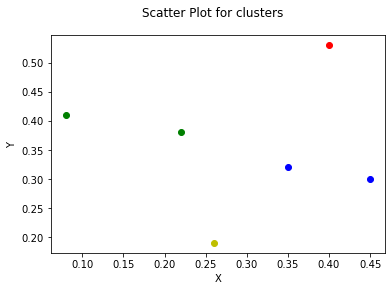

In [ ]:
hierarchical_clustering(data,"single",4)
#you can see that the color of data[1] and data[4] also became same in color, thus they are in same cluster now

###### Next merger, 2 clusters formed above will merge

[0, 1, 1, 3, 1, 1]


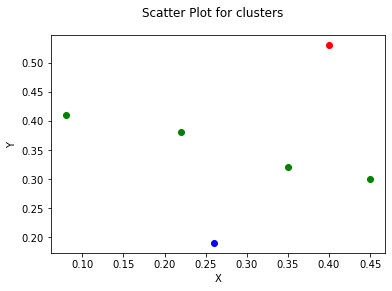

In [ ]:
hierarchical_clustering(data,"single",3)

[0, 1, 1, 1, 1, 1]


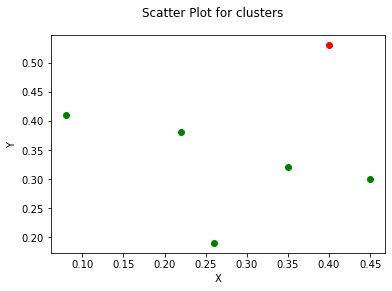

In [ ]:
hierarchical_clustering(data,"single",2)

###### Finally all are in one cluster

In [ ]:
hierarchical_clustering(data,"single",1)

NameError: ignored

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
neigbours = pairwise_distances(
    digits.data
    , metric='euclidean'
).argmin(axis = 1)
neigbours

array([   0,    1,    2, ..., 1794, 1795, 1796])

In [ ]:
from scipy.spatial import KDTree

""" Data """
data_i = np.array([601, 604, 605, 606])
data = np.array([[28.47, 83.43],[28.45, 83.42],[28.16, 83.36],[82.29, 83.39]])
print(data_i)
print(data)

""" KDTree """
N_NEIGHBORS = 2
kdtree = KDTree(data)
kdtree_q = kdtree.query(data, N_NEIGHBORS+1)  # 0-dist to self -> +1
print(data_i[kdtree_q[1][:, 1:]])             # discard 0-dist
                                              #   uses guarantee of sorted-by-dist


[601 604 605 606]
[[28.47 83.43]
 [28.45 83.42]
 [28.16 83.36]
 [82.29 83.39]]
[[604 605]
 [601 605]
 [604 601]
 [601 604]]


In [ ]:

all(neigbours[i] <= neigbours[i+1] for i in range(len(neigbours)-1))

True

In [ ]:
%%time
N_NEIGHBORS = 10
kdtree = KDTree(digits.data)
kdtree_q = kdtree.query(digits.data, N_NEIGHBORS+1)

CPU times: user 24.9 s, sys: 54.9 ms, total: 24.9 s
Wall time: 24.9 s


In [ ]:
pd.DataFrame(kdtree_q[1])

,0,1,2,3,4,5,6,7,8,9,10
0,0,877,1365,1541,1167,1029,464,957,1697,855,335
1,1,93,1120,1112,1050,1546,466,1634,1076,349,1380
2,2,57,51,50,115,277,54,502,113,116,556
3,3,259,1498,1518,475,279,865,347,961,1670,928
4,4,1777,100,1735,1244,1351,1198,97,1754,1788,1767
...,...,...,...,...,...,...,...,...,...,...,...
1792,1792,1698,815,1759,1686,1507,149,881,514,1226,1696
1793,1793,160,724,1703,646,848,166,1545,718,36,831
1794,1794,148,248,1763,242,1069,1327,1747,1766,1774,1363
1795,1795,254,251,1792,849,1453,417,199,1186,459,514


In [ ]:
lst_col_names = []
for i in range(N_NEIGHBORS):
    lst_col_names.append("neigbour" +str(i) + "_index")
lst_col_names = ["object_index"] + lst_col_names
df_tmp = pd.DataFrame(
    kdtree_q[1],
    columns = lst_col_names,
    )
dct_targets = dict(zip(list(range(len(digits.data))), digits.target))
df_tmp["object_target"] = df_tmp.object_index.map(dct_targets)

for i in range(N_NEIGHBORS):
    lst_col_names.append("neigbour" +str(i) + "_index")
    df_tmp["neigbour" +str(i) + "_index"] = df_tmp["neigbour" +str(i) + "_index"].map(dct_targets)
    
# df_tmp["neigbour1_target"] = df_tmp.neigbour1_index.map(dct_targets)
# df_tmp["neigbour2_target"] = df_tmp.neigbour2_index.map(dct_targets)

for i in range(N_NEIGHBORS):
    print(
        i, np.round(np.sum(df_tmp["object_target"] == df_tmp["neigbour" +str(i) + "_index"])
        /df_tmp.shape[0] * 100, 2)
    )

0 98.83
1 98.5
2 98.16
3 97.38
4 96.72
5 96.44
6 95.33
7 94.99
8 94.55
9 94.21


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10).fit(digits.data)

In [ ]:
kmeans.predict(digits.data)

array([5, 0, 0, ..., 0, 6, 6], dtype=int32)

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
pd.DataFrame(np.array([digits.target, kmeans.predict(digits.data)]).transpose())

,0,1
0,0,5
1,1,0
2,2,0
3,3,2
4,4,9
...,...,...
1792,9,6
1793,0,5
1794,8,0
1795,9,6


In [ ]:
df_tmp

,object_index,neigbour0_index,neigbour1_index,neigbour2_index,neigbour3_index,neigbour4_index,neigbour5_index,neigbour6_index,neigbour7_index,neigbour8_index,neigbour9_index,object_target
0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,1,2,2,2,2,8,2
3,3,3,3,3,3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1792,1792,9,9,9,9,9,9,9,9,9,9,9
1793,1793,0,0,0,0,0,0,0,0,0,0,0
1794,1794,8,8,8,8,8,8,1,1,1,8,8
1795,1795,9,9,9,9,8,9,9,9,9,9,9


In [ ]:
# pairwise_distances(
#     digits.data[1796].reshape(1, -1),
#     digits.data[:-1],
#     metric='euclidean'
# ).argmin(axis = 1)

In [ ]:
df_data = pd.DataFrame(
    pd.DataFrame(kdtree_q[1]),
    columns = ["object_index", "target"]
    )
    
# df_data.head(20)
data_train, data_test, label_train, label_test, indeces_train, indeces_test =train_test_split(
    digits.data[:len_cut],
    digits.target[:len_cut],
    range(len_cut),
    test_size = 0.3,
    random_state = RANDOM_STATE,
    stratify = digits.target[:len_cut],
)

NameError: ignored

In [ ]:
df_tmp.loc[indeces_train]

NameError: ignored

In [ ]:
# %%time
# def find_clusters_with_entropy_v4(df_data, df_target, alpha = 0, len_cut = 100):
len_cut = 100
df_data = digits.data.copy()
df_target = digits.target.copy()
alpha = 0
linkage = "single"
data_train, data_test, label_train, label_test =train_test_split(
        df_data[:len_cut],
        df_target[:len_cut],
        test_size = 0.3,
        random_state = RANDOM_STATE,
        stratify = df_target[:len_cut],
)

print(Counter(label_train))

arr_test_closest_to_train = pairwise_distances(
    data_test
    , data_train
    , metric='euclidean'
).argmin(axis = 1)
dct_test_closest_to_train = dict(
    zip((range(data_test.shape[0])), arr_test_closest_to_train)
)

data = pairwise_distances(data_train, data_train, metric='euclidean').copy()
targets = label_train.copy()
np.fill_diagonal(data,sys.maxsize)

data_tmp = data.copy()
len_data = data_train.shape[0]
clusters = {}
row_index = -1
col_index = -1
array = np.array([])

for n in range(data.shape[0]):
    array = np.append(array, n)

clusters[0] = array.copy()

df_clusters = pd.DataFrame([])
df_clusters["element"] = range(data.shape[0])
num_targets = len(np.unique(targets))
lst_targets = np.unique(targets)

cluster_counter_array = np.array(2 * len_data)
target_counter_array = np.array(2 * len_data)
cluster_array_entropy = np.array(2 * len_data)
len_add_arr = 2

cluster_counter_array = [
    Counter([targets[i]])
    for i in range(len_data)
]

target_counter_array = pd.DataFrame(
    [
        [
            Counter(targets[[i, j]])
            for j in range(len_data)
        ]
        for i in range(len_data)
    ]
)

cluster_array_entropy = pd.DataFrame(
    [
        [
            entropy(list(target_counter_array[i][j].values())/np.int64(len_add_arr))
            for j in range(len_data)
        ]
        for i in range(len_data)
    ]
)

print("5")
cluster_array_entropy_k = cluster_array_entropy.copy()

for k in tqdm(range(1, data.shape[0])):
# for k in tqdm(range(2)):
    df_clusters["cluster"] = array.copy()
    data_with_entropy = data.copy()

    data_with_entropy = data_with_entropy + alpha * np.array(cluster_array_entropy_k)
    ind = np.unravel_index(np.argmin(data_with_entropy, axis=None), data.shape)
    row_index = ind[0]
    col_index = ind[1]
    min_val = data_with_entropy[ind]

    arr_row_index = array[row_index]
    arr_col_index = array[col_index]

    part1 = list(df_clusters[df_clusters.cluster == arr_row_index].element)
    part2 = list(df_clusters[df_clusters.cluster == arr_col_index].element)
    all_parts_combinations = np.transpose(
        [np.tile(part1, len(part2)), np.repeat(part2, len(part1))]
        )
    data[all_parts_combinations[:, 0], all_parts_combinations[:, 1]] = sys.maxsize
    data[all_parts_combinations[:, 1], all_parts_combinations[:, 0]] = sys.maxsize
    print()
    if k < 10:
        print(k, ind, all_parts_combinations[:, 0], all_parts_combinations[:, 1])

    new_cluster_num = k - 1 + data.shape[0]

    add_cluster_counter = cluster_counter_array[row_index] + cluster_counter_array[col_index]

    target_counter_array.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
    target_counter_array.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

    cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 0, inplace = True)
    cluster_array_entropy.drop([arr_row_index, arr_col_index], axis = 1, inplace = True)

    add_col_counter = [
        cluster_counter_array[i] + add_cluster_counter
        for i in target_counter_array.columns
    ]

    add_col_entropy = [
        entropy(
            list(x.values())/np.sum(list(x.values()))
        )
        for x in add_col_counter
    ]

    cluster_counter_array = np.append(
        cluster_counter_array
        , add_cluster_counter
    )

    target_counter_array[new_cluster_num] = add_col_counter
    add_col_counter.append(add_cluster_counter)

    target_counter_array = target_counter_array.append(
        pd.Series(add_col_counter, name = new_cluster_num, index = target_counter_array.columns), ignore_index = False
    )

    cluster_array_entropy[new_cluster_num] = add_col_entropy
    add_col_entropy.append(sys.maxsize)
    cluster_array_entropy = cluster_array_entropy.append(
        pd.Series(
            add_col_entropy,
            name = new_cluster_num,
            index = cluster_array_entropy.columns
            ), ignore_index = False
    )

    array[list(part1)] = new_cluster_num
    array[list(part2)] = new_cluster_num
    clusters[k] = array.copy()

    add_col_entropy_new_cluster = [
        cluster_array_entropy[array[i]][new_cluster_num]
        for i in range(data.shape[0])
    ]

    all_parts = list(set(part1).union(set(part2)))

    for ind_all_parts in all_parts:
        cluster_array_entropy_k[ind_all_parts] = add_col_entropy_new_cluster
# num_elements = data.shape[0]
# n_targets = len(np.unique(targets))
# acc_res_train, dct_clusters_targets = cluster_score_v2(
#     targets, list(clusters[num_elements - n_targets]), data
#     )
# dct_prediction_cluster = dict(zip(
#     list(range(data_train.shape[0])),
#     clusters[num_elements - n_targets].astype(int))
# )

# df_test_check = pd.DataFrame(list(range(data_test.shape[0])), columns = ["test_index"])
# df_test_check["closest_point_from_train"] = arr_test_closest_to_train
# df_test_check["prediction_cluster"] = df_test_check["closest_point_from_train"].map(dct_prediction_cluster)
# df_test_check["prediction_target"] = df_test_check["prediction_cluster"].map(dct_clusters_targets)
# df_test_check["target"] = label_test

# acc_res_test = np.sum(df_test_check["prediction_target"] == df_test_check["target"])/df_test_check.shape[0]
# acc_res_train, acc_res_test

Counter({6: 8, 1: 8, 3: 8, 0: 8, 2: 7, 7: 7, 9: 6, 5: 6, 8: 6, 4: 6})
5


  4%|▍         | 3/69 [00:00<00:02, 29.90it/s]


1 (47, 68) [47] [68]

2 (3, 59) [3] [59]

3 (38, 68) [38 38] [47 68]

4 (38, 42) [38 47 68] [42 42 42]

5 (7, 29) [7] [29]

6 (55, 68) [55 55 55 55] [38 42 47 68]


 10%|█         | 7/69 [00:00<00:02, 30.64it/s]


7 (18, 20) [18] [20]


 16%|█▌        | 11/69 [00:00<00:01, 32.58it/s]


8 (7, 69) [ 7 29] [69 69]

9 (22, 32) [22] [32]








 28%|██▊       | 19/69 [00:00<00:01, 34.99it/s]

 43%|████▎     | 30/69 [00:00<00:00, 42.42it/s]

 59%|█████▉    | 41/69 [00:01<00:00, 45.29it/s]

 77%|███████▋  | 53/69 [00:01<00:00, 50.23it/s]

 97%|█████████▋| 67/69 [00:01<00:00, 58.41it/s]

100%|██████████| 69/69 [00:01<00:00, 45.93it/s]


In [ ]:
# np.unravel_index(np.argmin(data_with_entropy, axis=None), data.shape)
np.unravel_index(np.argmin(data_tmp, axis=None), data.shape)

(47, 68)

In [ ]:
k

2

In [ ]:
len_cut = None
df_data = digits.data.copy()
df_target = digits.target.copy()
data_train, data_test, label_train, label_test =train_test_split(
        df_data[:len_cut],
        df_target[:len_cut],
        test_size = 0.3,
        random_state = RANDOM_STATE,
        stratify = df_target[:len_cut],
)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering(n_clusters = 10, linkage="single").fit(data_train)
clustering

clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cluster_score_v2(label_train, clustering.labels_, data_train)

target,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,-124.0,-127.0,-122.0,-127.0,-127.0,-127.0,-126.0,-123.0,-119.0,-125.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0
2,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


(0.10660302307080351,
 {0: 9, 1: 8, 2: 2, 3: 5, 4: 3, 5: 0, 6: 4, 7: 1, 8: 7, 9: 6})